# Ames Housing Project Exploratory Data Analysis

### Table of Contents

* [Step 1. Imports](#Step-1:-Import) 
* [Step 2. Load the Data](#Step-2:-Load-the-data)
* [Step 3.  Review Summary Data](#Step-3:--Summary-of-Data)
* [Step 4.  Univariate Analysis (Sales Price)](#Step-4:--Look-at-Sale-Price-Variable-(Univariate-Analysis))
* [Step 5.  Bivariate Analysis](#Step-5:-Bivariate-Analysis)
    * [Correlations and Heatmap](#Correlations-and-Heatmap)
    * [Scatter Plots](#Scatter-plots)
    * [Box Plots](#Box-Plots)
* [Step 6.  Random Forest Feature Importance](#Step-6:-Random-Forest-Feature-importance)
    * [Random Forest Feature Importance with All Variables](#Random-Forest-Using-All-Variables)
    * [Feature Importance WITHOUT Overall Quality Variable](#Random-Forest-Feature-Importance-WITHOUT-the-Overall-Qual-Variable)
    * [Feature Importance with the inclusion of a random variable](#Feature-Importance-with-the-addition-of-a-Random-Variable)
* [Step 7.  A Closer Look at Key Variables](#Step-7:--Deeper-Dive-into-Most-Relevant-Variables)
    * [Overall Quality](#Overall-Qual)
    * [Garage Cars](#Garage-Cars)
    * [Total Square Feet](#Gross-Livable-Area-SF)
    * [Year Built](#Year-Built)
    * [Basement Square Feet](#Basement-SF)  
* [Step 8.  Summary of Findings](#Step-8-Summary-of-findings)




## Step 1: Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

plt.rcParams.update({'figure.figsize': (7.0, 5.0)})
plt.rcParams.update({'font.size': 14})

import sys  
import warnings
warnings.filterwarnings("ignore")


## Step 2: Load the data

In [2]:
housing_data = pd.read_csv('housing_data_cleaned.csv')

In [3]:
housing_data.shape

(2930, 78)

## Step 3:  Summary of Data

In [4]:
housing_data.head

<bound method NDFrame.head of       Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL           NaN      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     Alle

In [5]:
housing_data.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


## Step 4:  Look at Sale Price Variable (Univariate Analysis)

#### Our target is the Sale Price.  It is a continuous variable.  Lets look at it first

Text(0.5, 1.0, 'Histogram of target variable Sales Price')

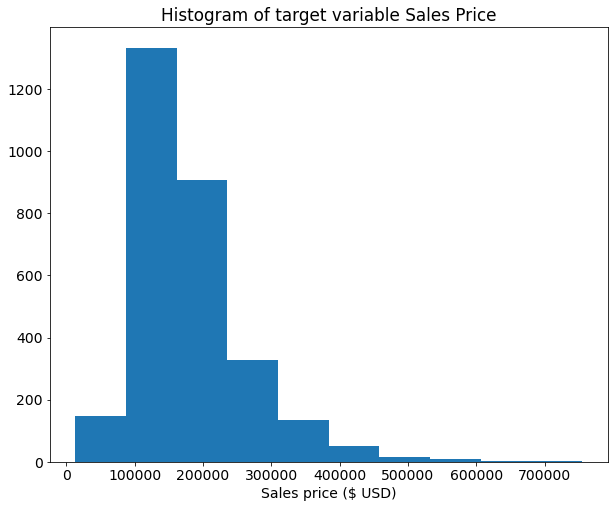

In [6]:
plt.rcParams.update({'figure.figsize': (10, 8.0)})
plt.rcParams.update({'font.size': 14})


plt.hist(housing_data['SalePrice'])
plt.xlabel('Sales price ($ USD)')
plt.title('Histogram of target variable Sales Price')
#plt.savefig('univariate.png')

We see our sales price is skewed to the right with a few sales price well above the mean.  The bulk of the sales are around the mean sales price of $180K.

In [7]:
housing_data['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Step 5: Bivariate Analysis

#### Correlations and Heatmap

In [8]:
housing_data.corr()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.173593,0.011797,-0.007034,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030907,...,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
PID,0.173593,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,0.011797,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.007034,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.031354,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.048500,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.011054,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.052319,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.075566,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.030907,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285


Ok.  That is interesting.  I notice overall quality is highly correlated with the sales price.  Also highly correlated is year of most recent addtion / remodel.  Lets see how our pairplot looks...

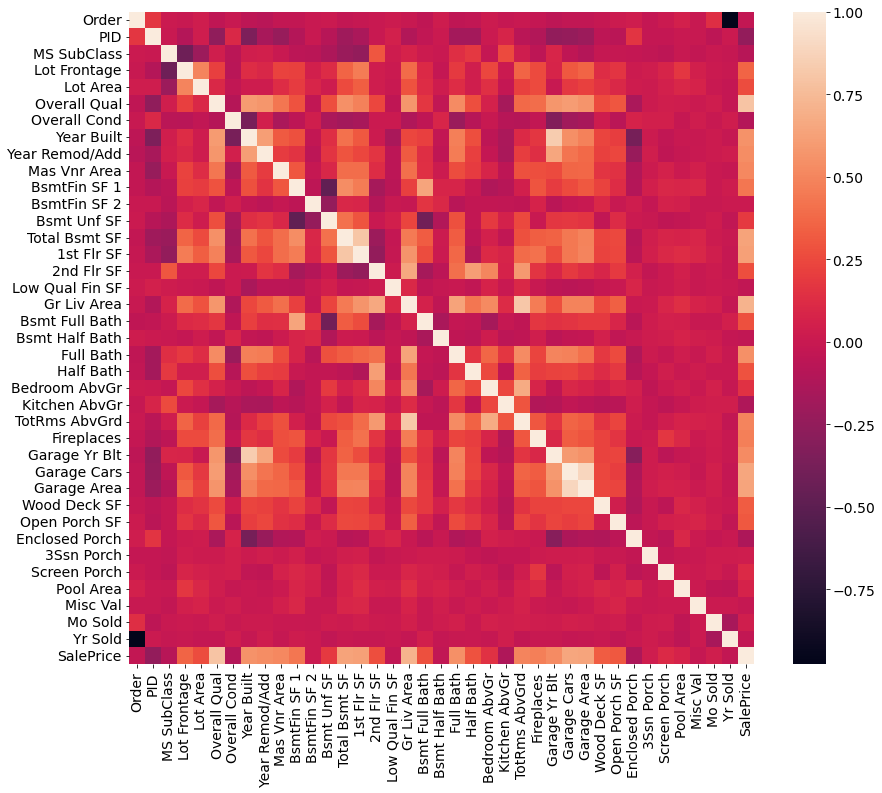

In [9]:
plt.subplots(figsize=(14,12))
sns.heatmap(housing_data.corr());
#plt.savefig('heatmap.png')

Great.  Right off the bat we can see a high positive correlation between sales price and a few variables including:  Overall Qual, Gr Liv Area, Full Bath, Garage Cars and more. 


Subsetting our data into numeric (integer and float) variables and object variables

In [10]:
integer_columns = housing_data.select_dtypes(include=['int64']).columns
float_columns = housing_data.select_dtypes(include=['float64']).columns
#numeric_columns = integer_columns + float_columns
object_columns = housing_data.select_dtypes(include=['object']).columns

In [11]:
numeric_columns = integer_columns.append(float_columns)

In [12]:
#numeric_columns.values.tolist()

In [13]:
list_variables = ['PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
 '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
 'TotRms AbvGrd', 'Fireplaces', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area',
 'Misc Val', 'Mo Sold', 'Yr Sold', 'Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Yr Blt', 'Garage Cars', 'Garage Area']

For our 38 variables with numeric value we are going to look at a scatter plot of the variable plotted with the sales price to visualize correlations between each 'numeric' variable and the target variable.

#### Scatter plots

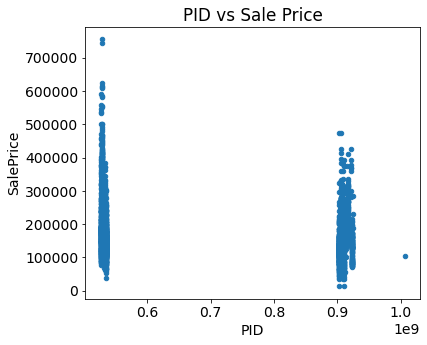

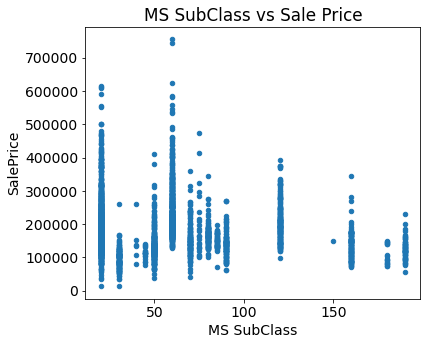

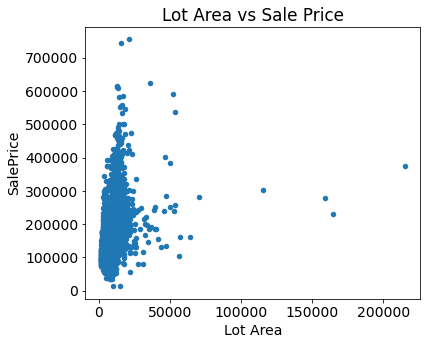

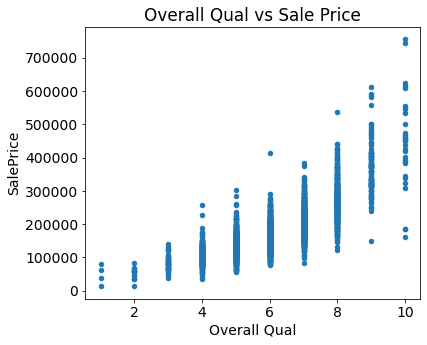

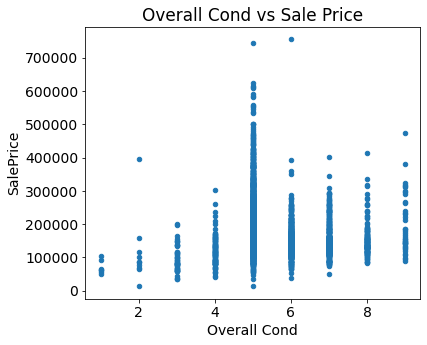

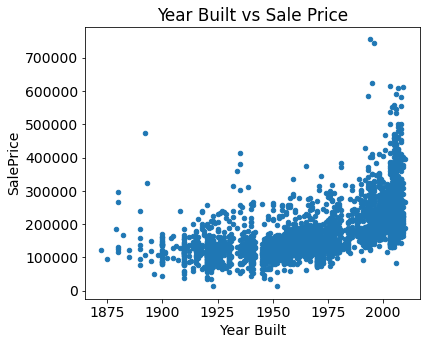

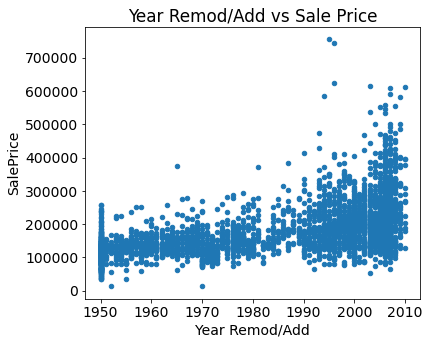

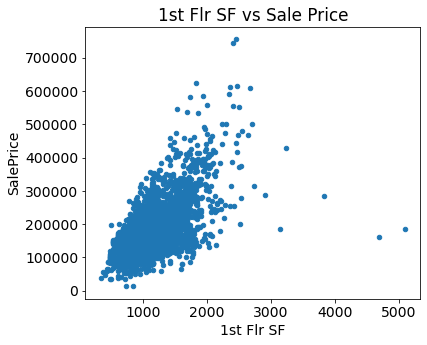

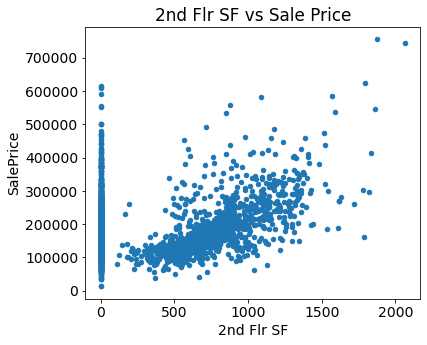

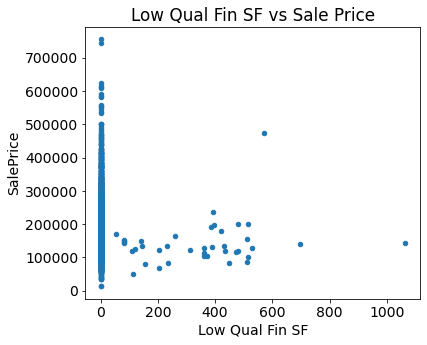

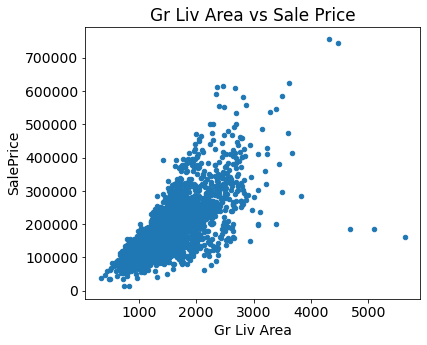

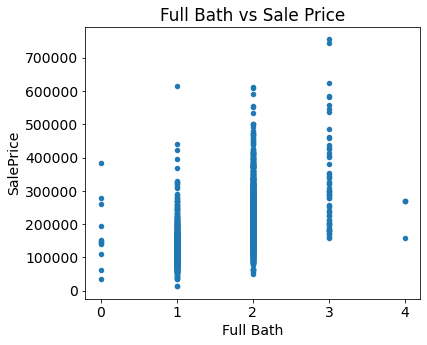

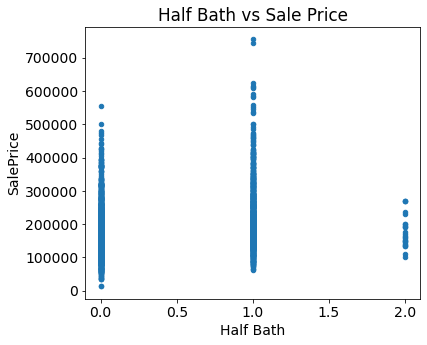

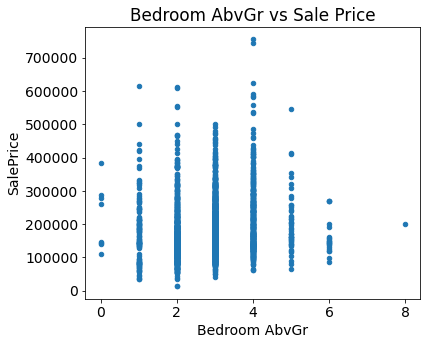

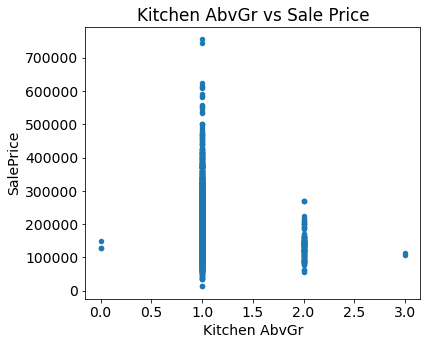

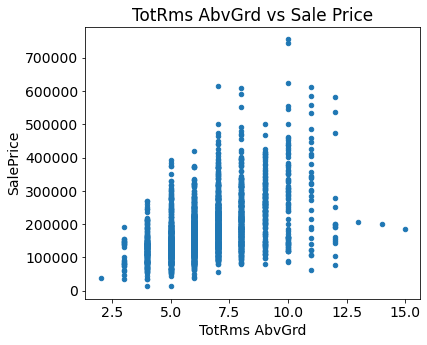

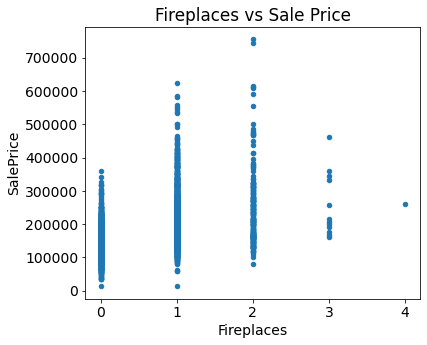

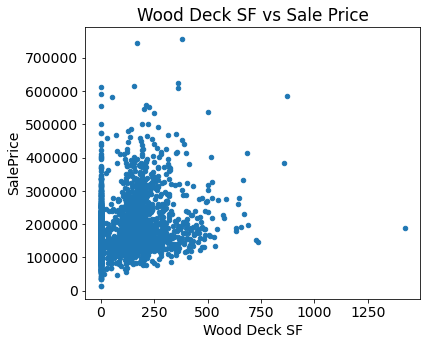

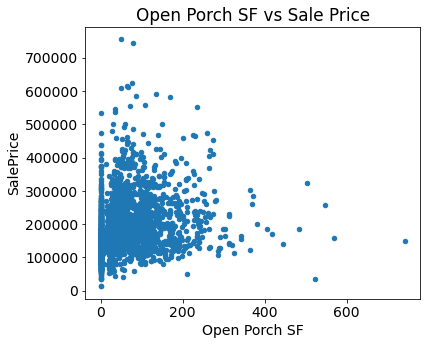

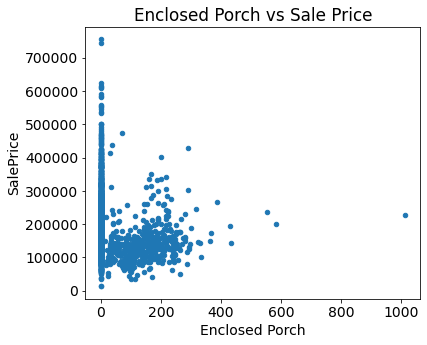

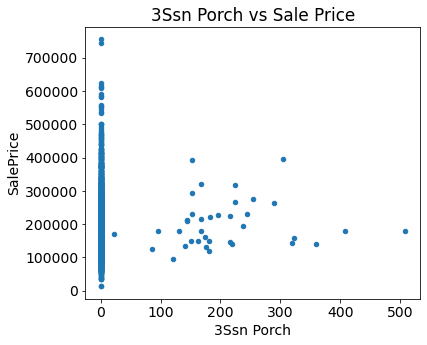

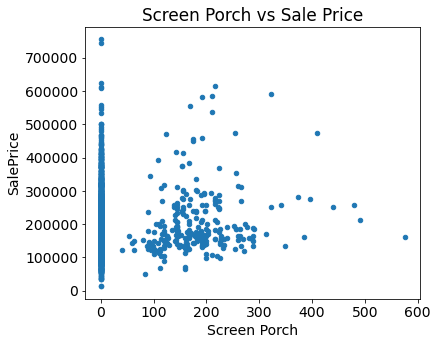

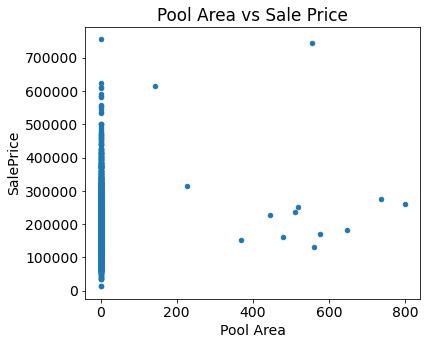

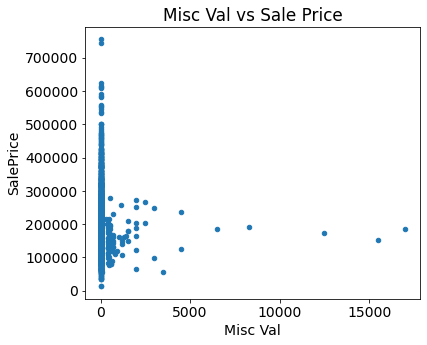

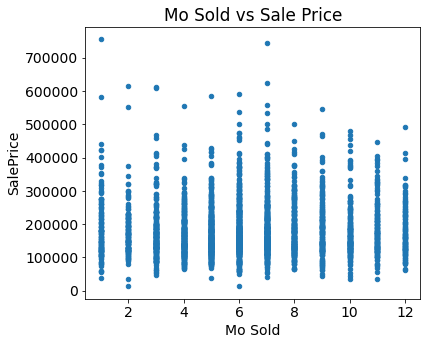

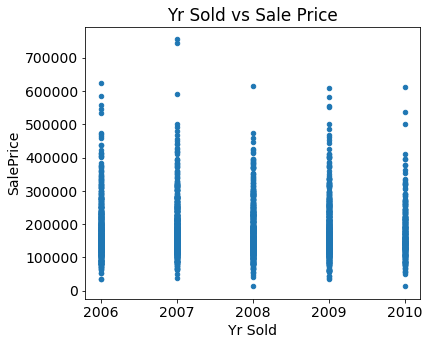

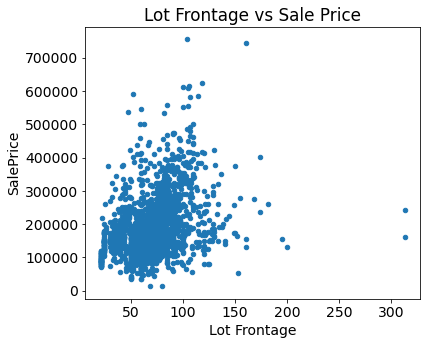

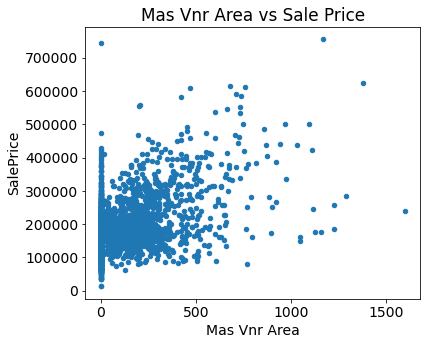

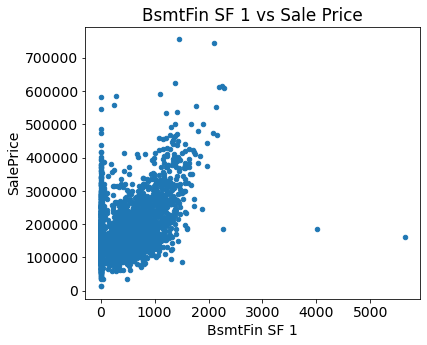

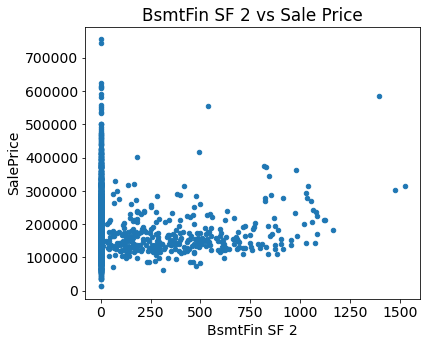

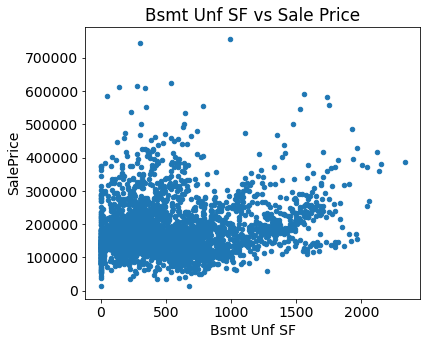

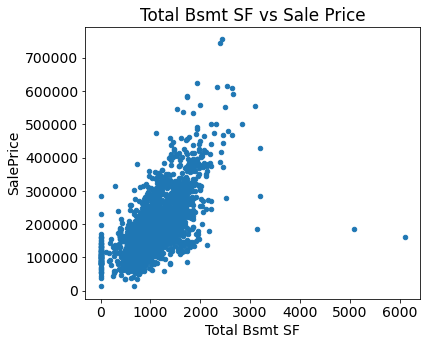

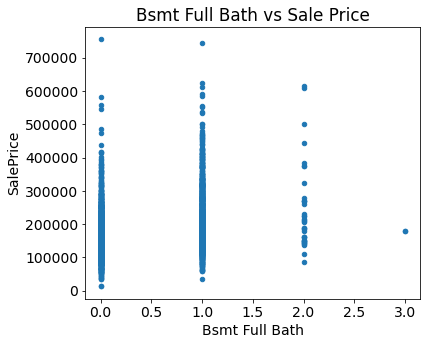

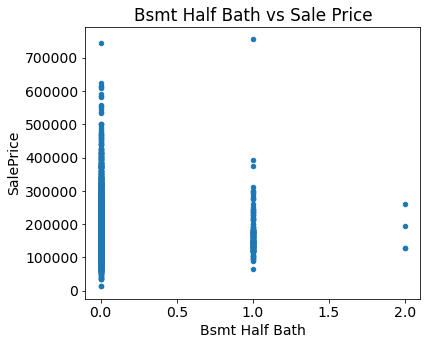

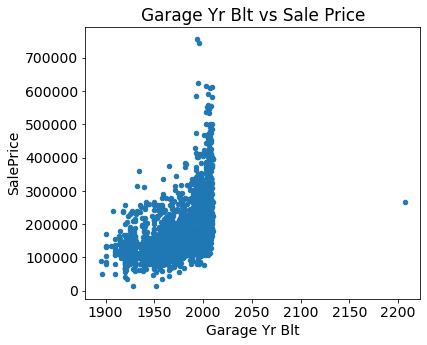

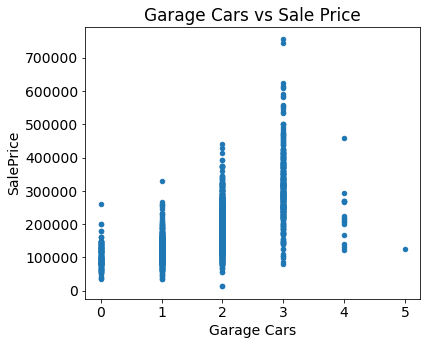

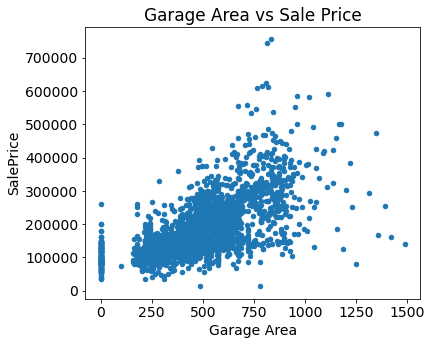

In [14]:
#  Make some plots of our numeric variables
for item in list_variables:
    housing_data.plot(x = item, y = 'SalePrice', kind = 'scatter', figsize = (6, 5))
    plt.title(item + " vs Sale Price")
    plt.show()

This is promising.  The above charts represent a comparison of our numeric variables (those with float or integer data types) compared to our sales price.  In the charts we see a hand full of variables that clearly show a correlation with our target variable.  These include:  Overal Qual, Year Built, 1st Fl SF, 2n Fl Sf, Gr Liv Ar (the previous three variables are for square footage of the first, the second and the total square foot of living area) also correlated are Total Basement Sf, Garage Cars , and Garage Area.  Of note:  Pool Area - we kept this variable but it doesnt seem to be highly correlated with our target variable.  Also Garage Year Blt show an outlier of a date in the future. 

In [15]:
#object_columns.values.tolist()

In [16]:
## this list is of variables that are not numeric in type.  they are 'objects'
list_2 = ['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Lot Config', 'Land Slope', 'Neighborhood',
 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type',
 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Sale Type', 'Sale Condition']

#### Box Plots

For our object variables we can go ahead and create a box plot of showing the category and compare to the sales price.

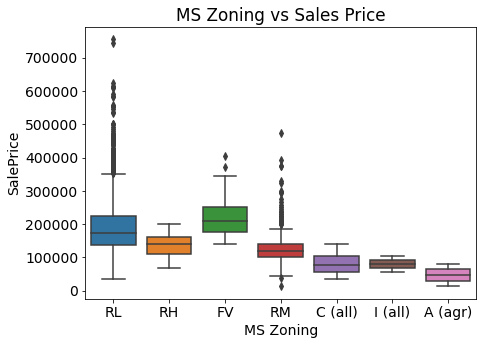

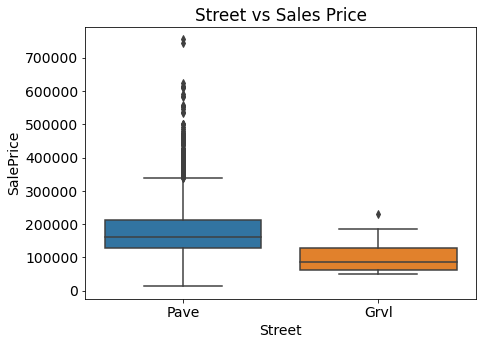

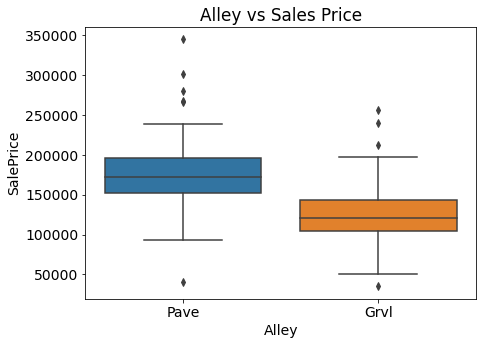

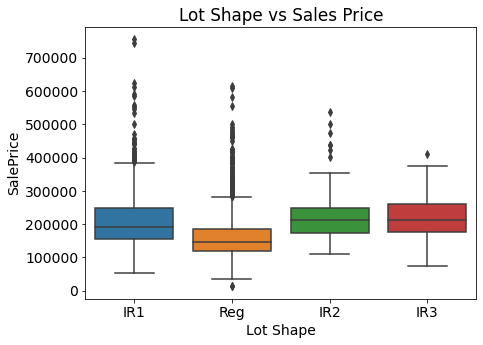

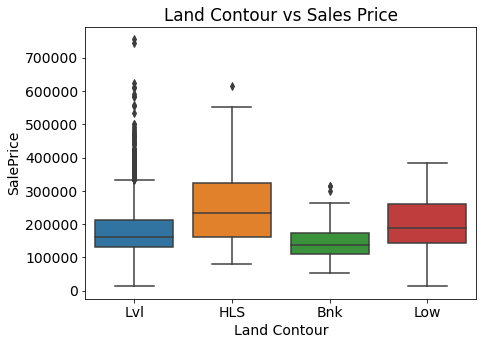

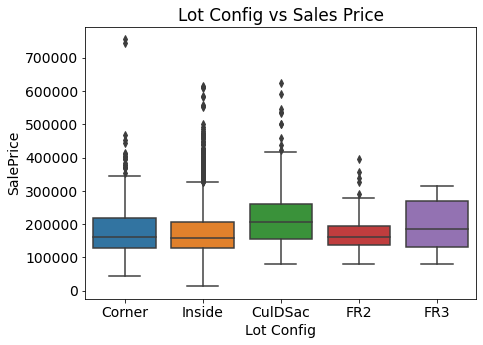

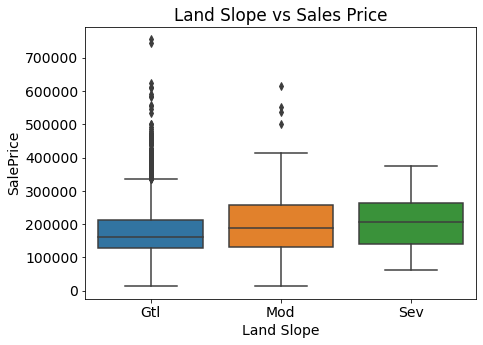

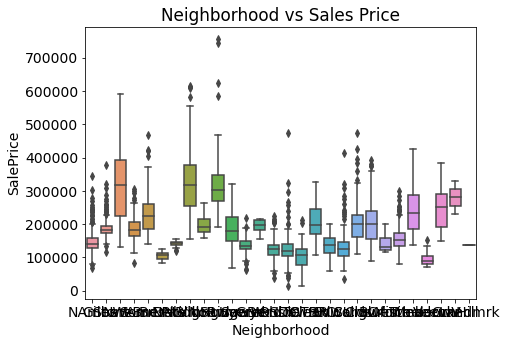

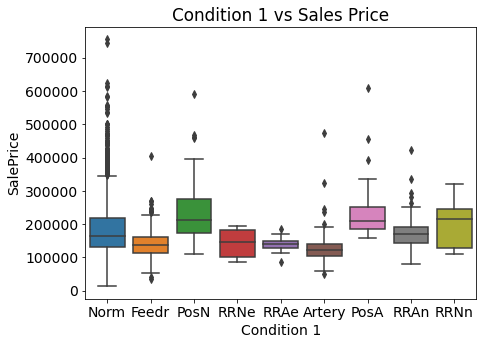

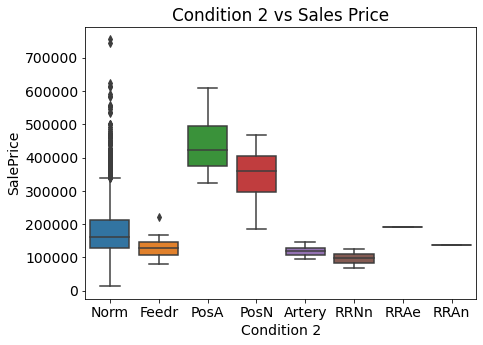

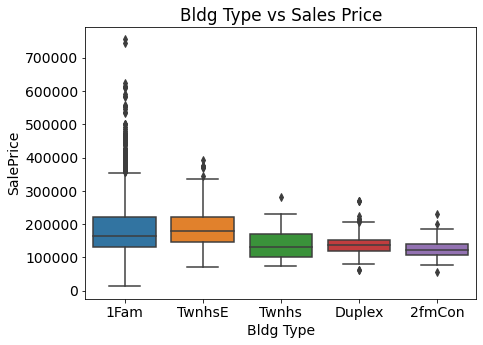

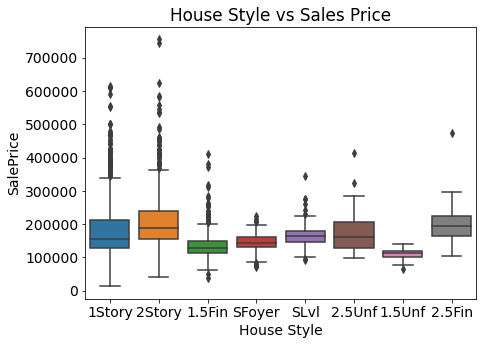

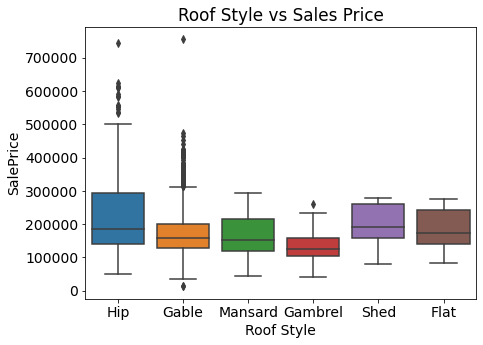

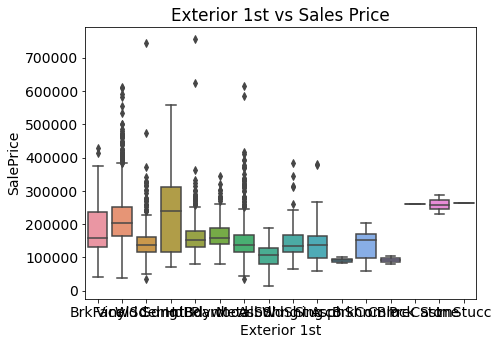

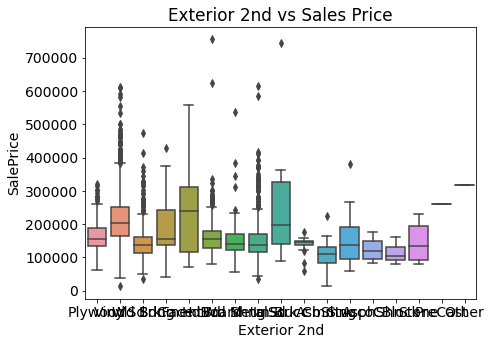

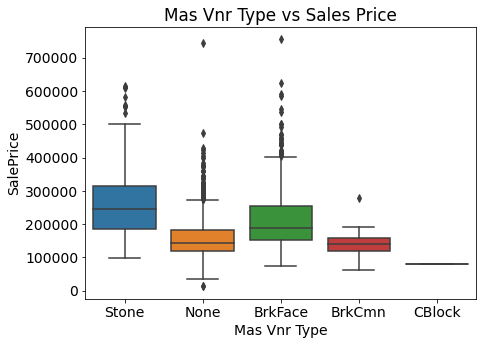

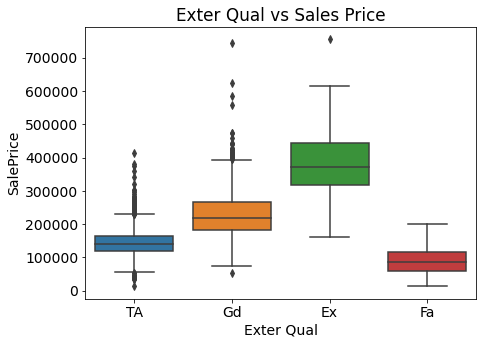

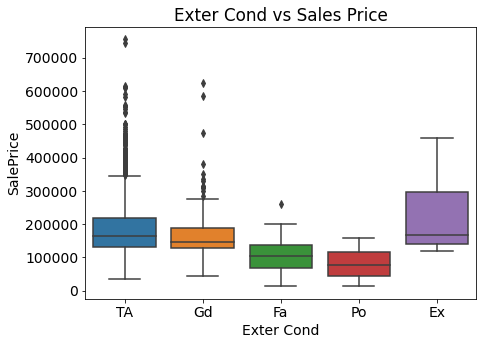

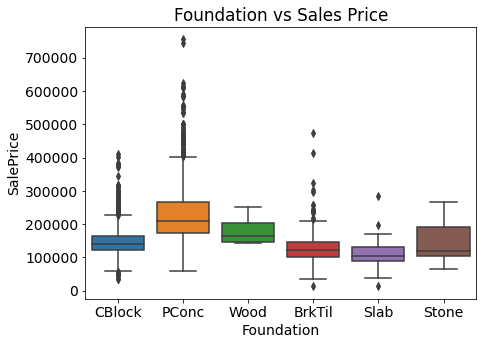

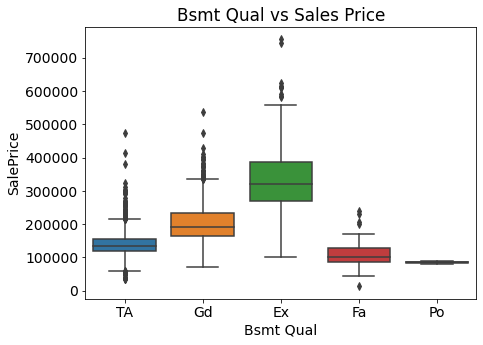

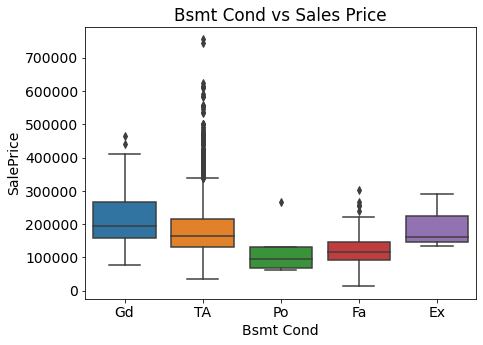

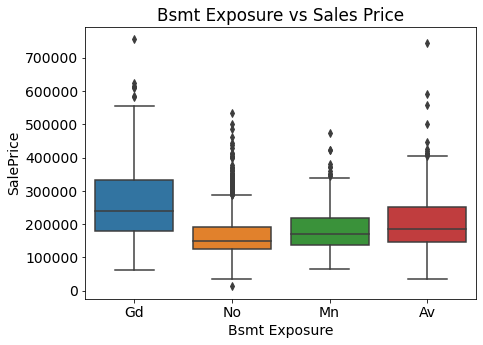

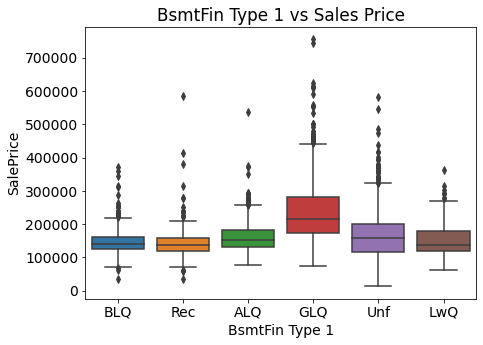

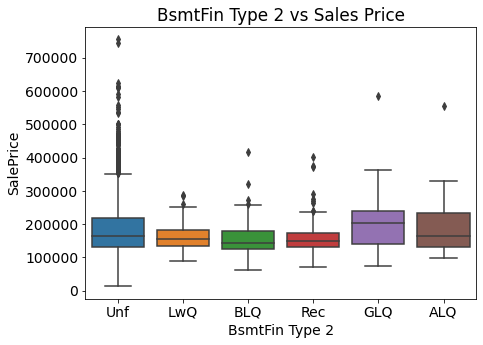

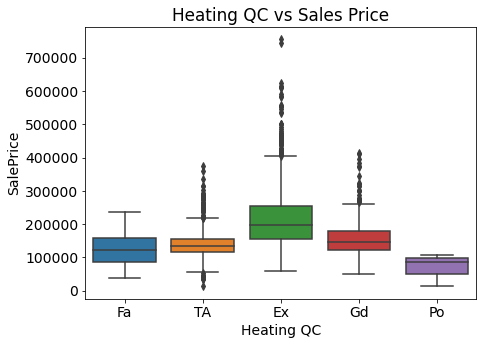

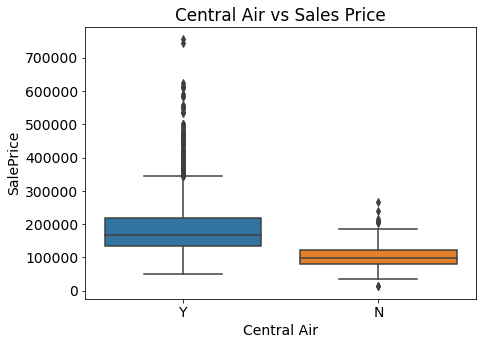

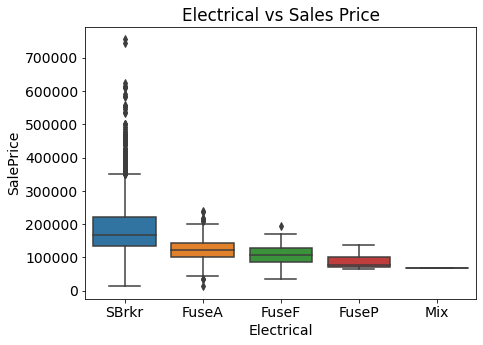

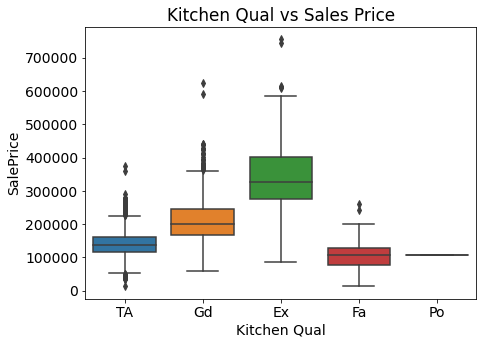

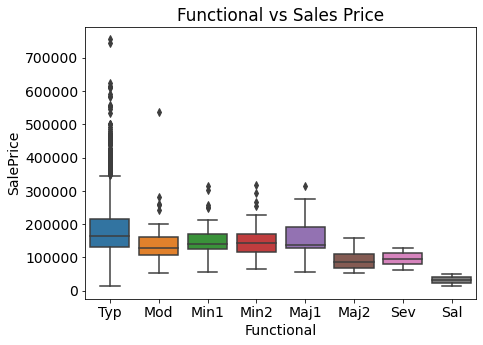

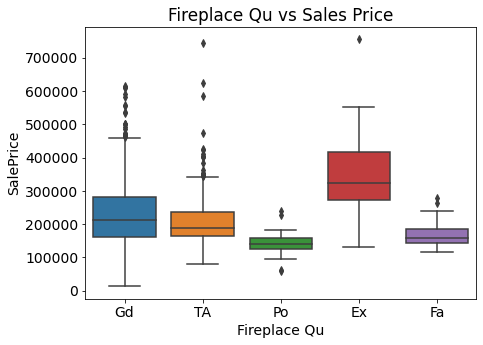

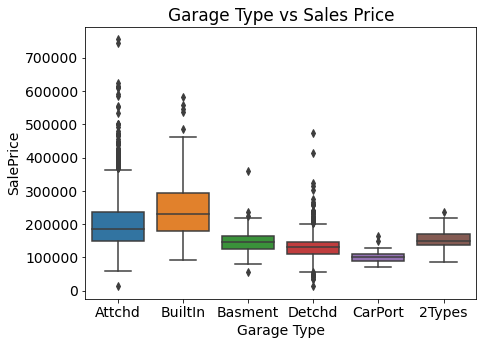

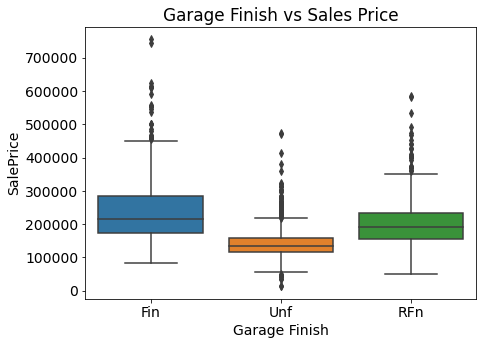

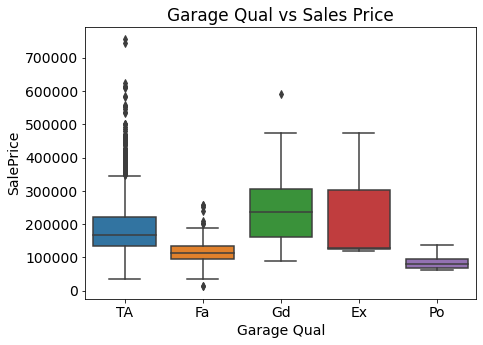

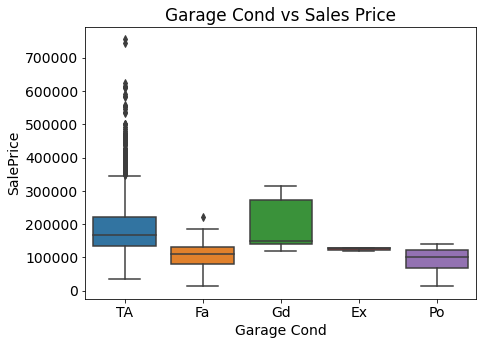

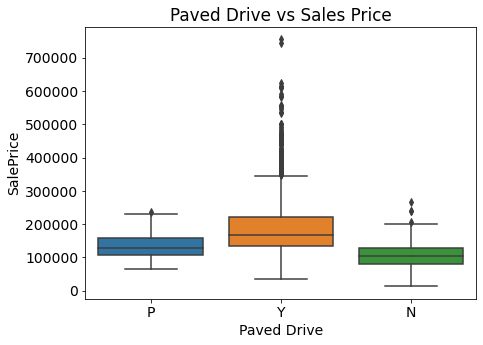

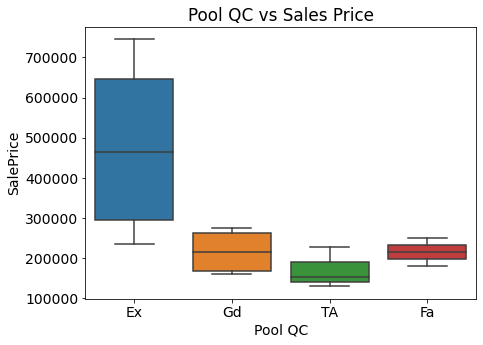

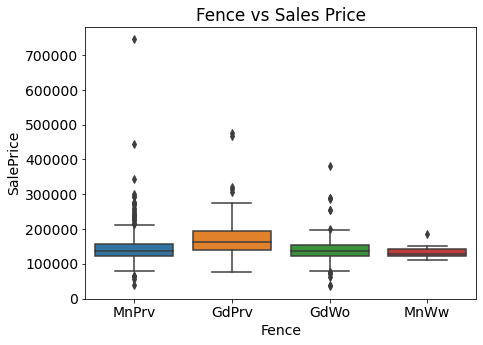

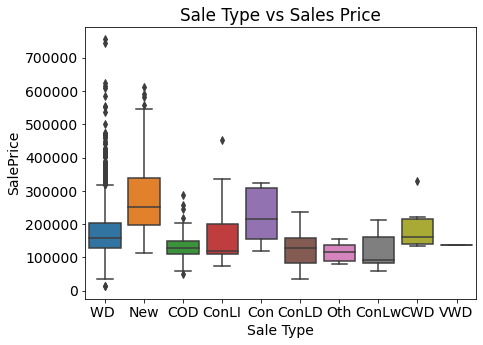

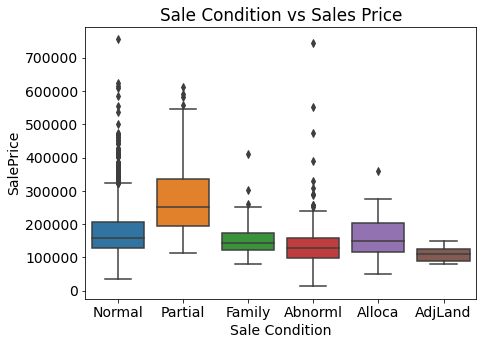

In [17]:
for item in list_2:
    plt.rcParams.update({'figure.figsize': (7.0, 5.0)})
    sns.boxplot(x = item, y = 'SalePrice', data = housing_data)
    plt.title(item + ' vs Sales Price')
    plt.show()

The above box plots charts look at our variables whose variables are of data type object.  The box plots show our mean and interquartile ranges of each variable compared with our target variable of sales price.  Again the results are promising and we see a number of variables that may help explain the sales price including:  MS Zoning, Street, Alley (we saw earlier that the difference in sales price for homes with paved vs gravel alleys persists even when we control for neighborhood).  We once again see a difference in sales prices among neighborhood and with other variables including Exter Qual, Bsmt Qual, Central Air, Pool QC,and Kitchen Qual.   

## Step 6: Random Forest Feature importance

####  Using dummy variables so we can include all of our data in the feature importance (not just numerical data)

#### Random Forest Using All Variables

In [18]:
df = pd.get_dummies(housing_data, drop_first = True)
df = df.dropna()
df.shape

(2274, 246)

In [19]:
df_y = df[['SalePrice']]
df_y.shape

(2274, 1)

In [20]:
df_X = df.drop(columns=['SalePrice'])
df_X.shape

(2274, 245)

In [21]:
X = df_X
y = df_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [22]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

Text(0.5, 1.0, 'Feature Importances for Ames Values')

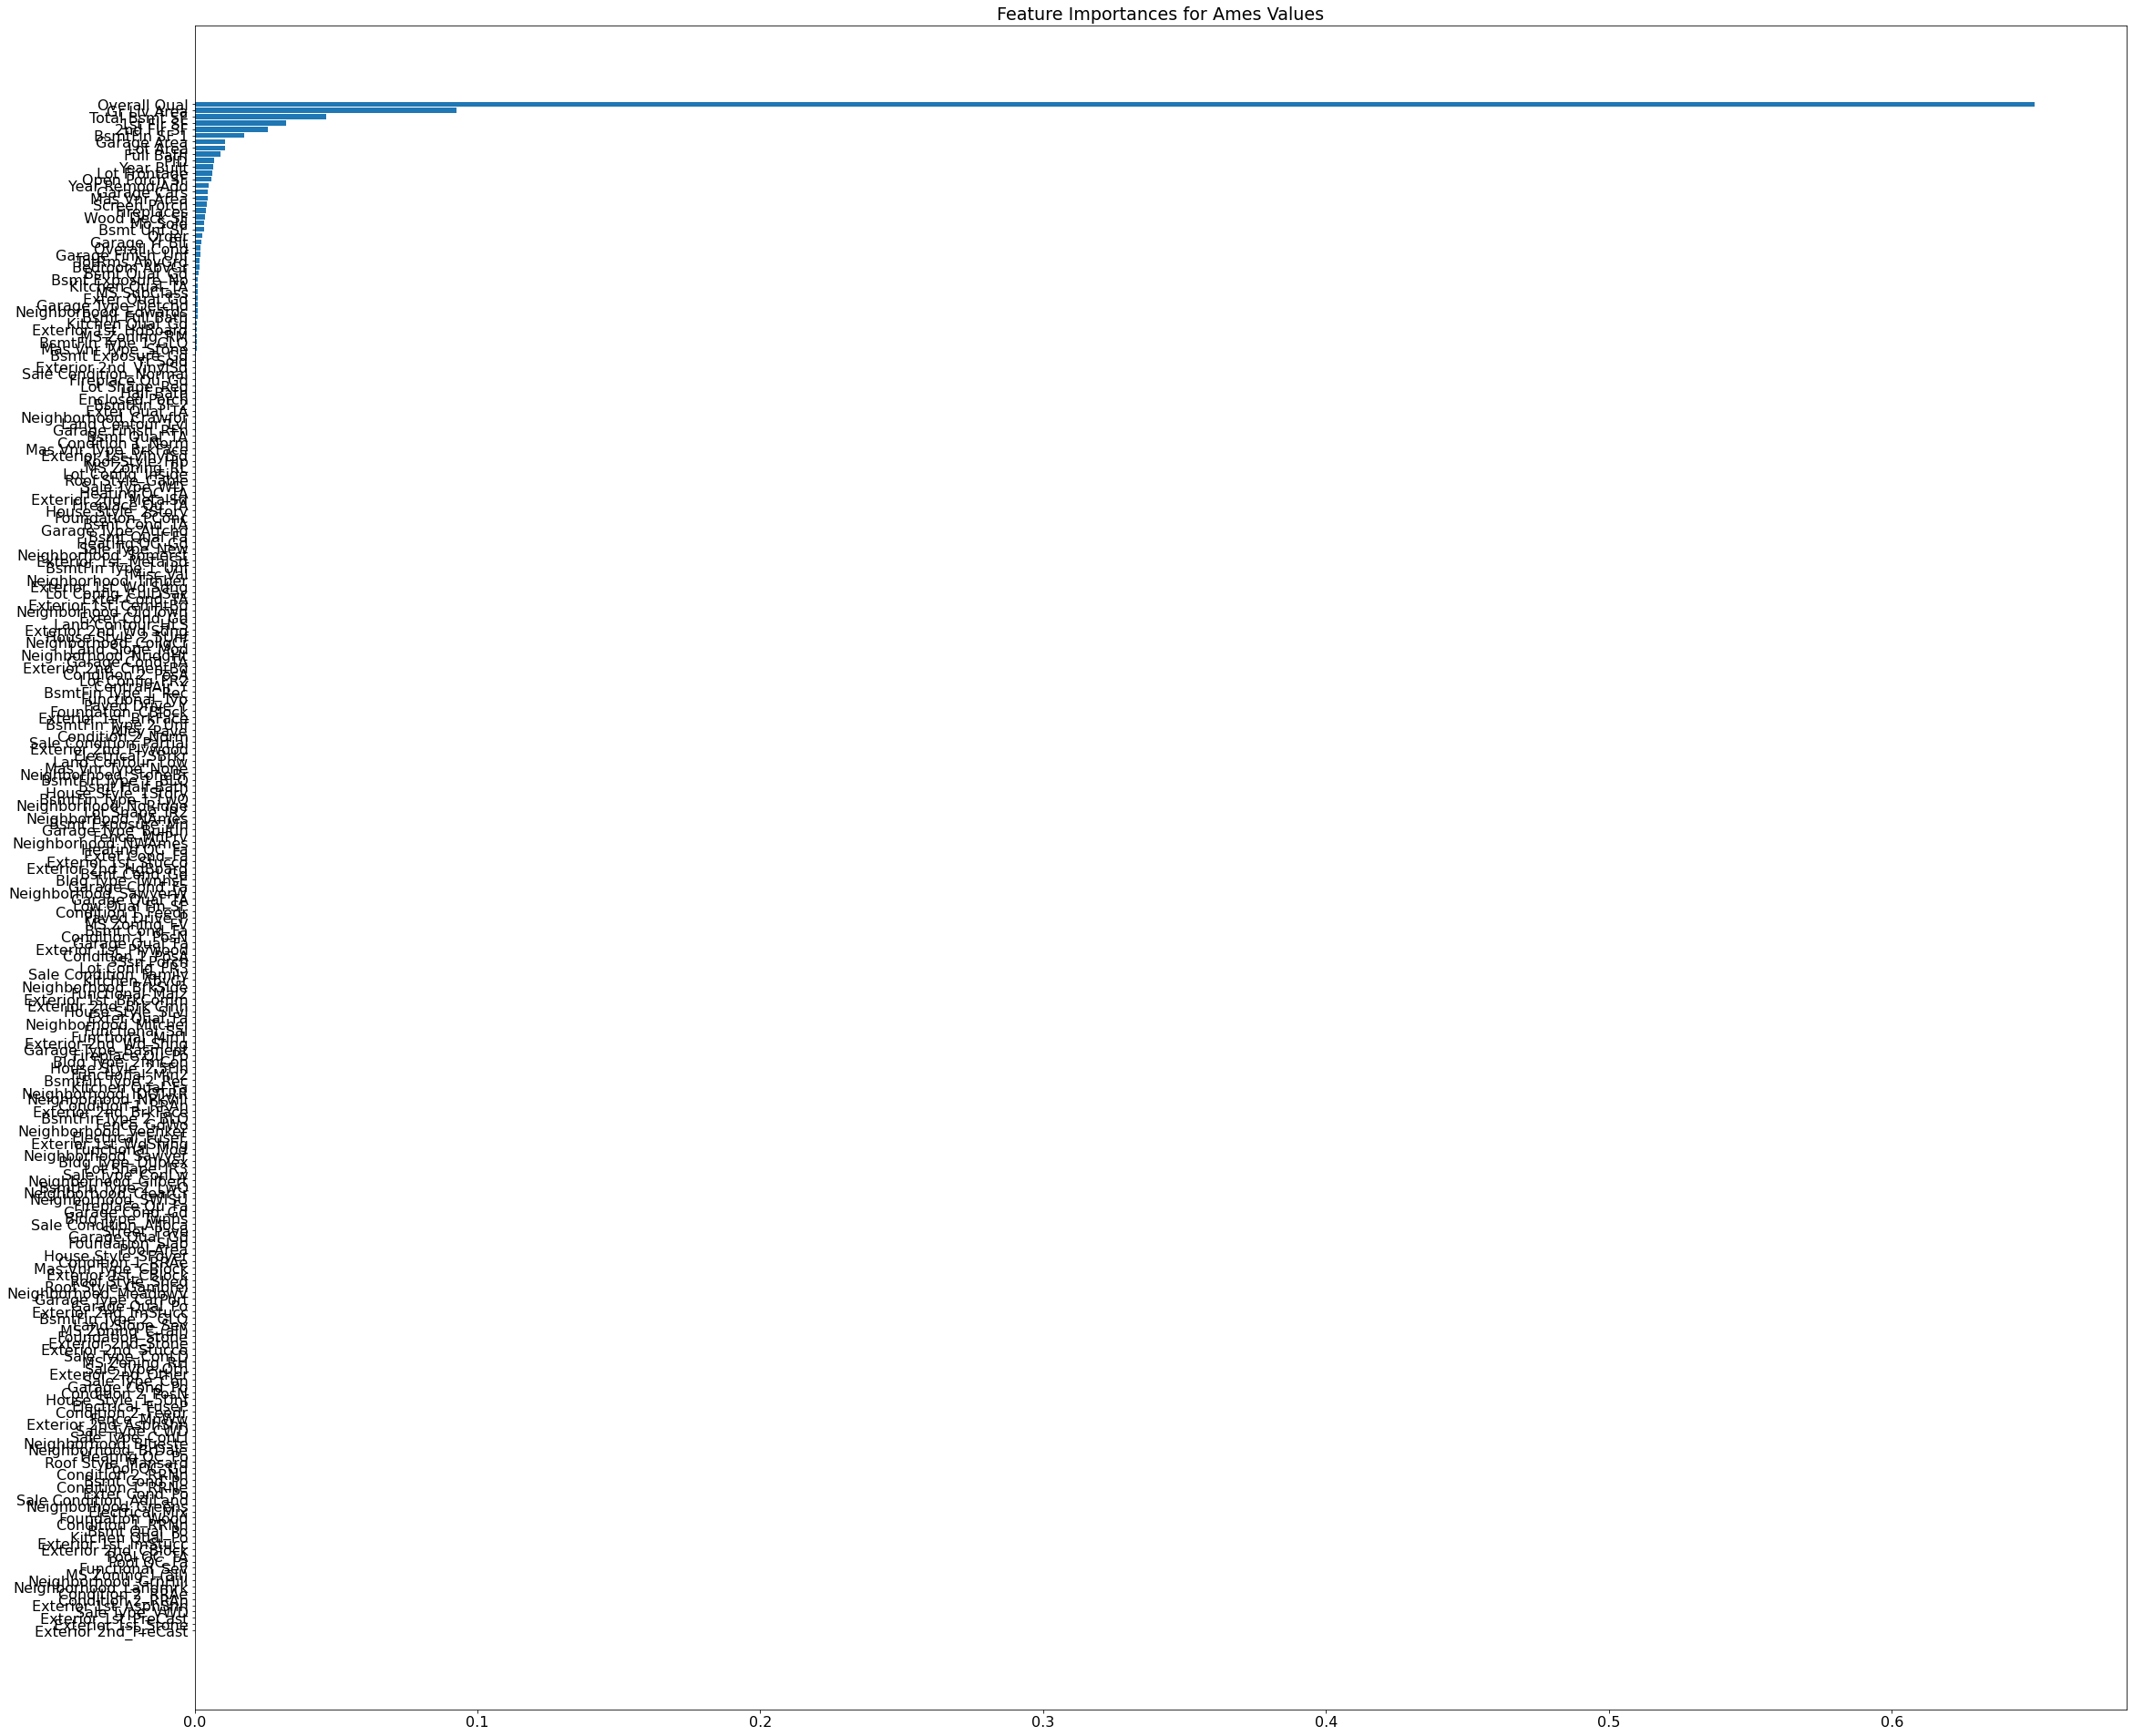

In [23]:
plt.rcParams.update({'figure.figsize': (38.0,34.0)})
plt.rcParams.update({'font.size': 16})

sorted_idx = rf.feature_importances_.argsort()
plt.barh(df_X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.title("Feature Importances for Ames Values")
#plt.savefig('FeatureImportance.png')


This is just too many variables for me to look at.  So...eliminate the variables which have little feature importance and look closer at the variables with 'high' feature importance

In [24]:
# Run the below to see ordered list of variables from feature importance.
##pd.options.display.max_rows = 40000
##pd.Index.tolist(df.columns[sorted_idx])


In [25]:
df_XX = df_X[['Lot Frontage', 'Mas Vnr Area', 'PID', 'Garage Cars',
 'Full Bath', 'Garage Area', 'Year Built', 'Lot Area', 'BsmtFin SF 1', '2nd Flr SF', '1st Flr SF',
 'Total Bsmt SF', 'Gr Liv Area', 'Overall Qual']]

In [26]:
X = df_XX
y = df_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [27]:
rf15 = RandomForestRegressor(n_estimators=100)
rf15.fit(X_train, y_train)

RandomForestRegressor()

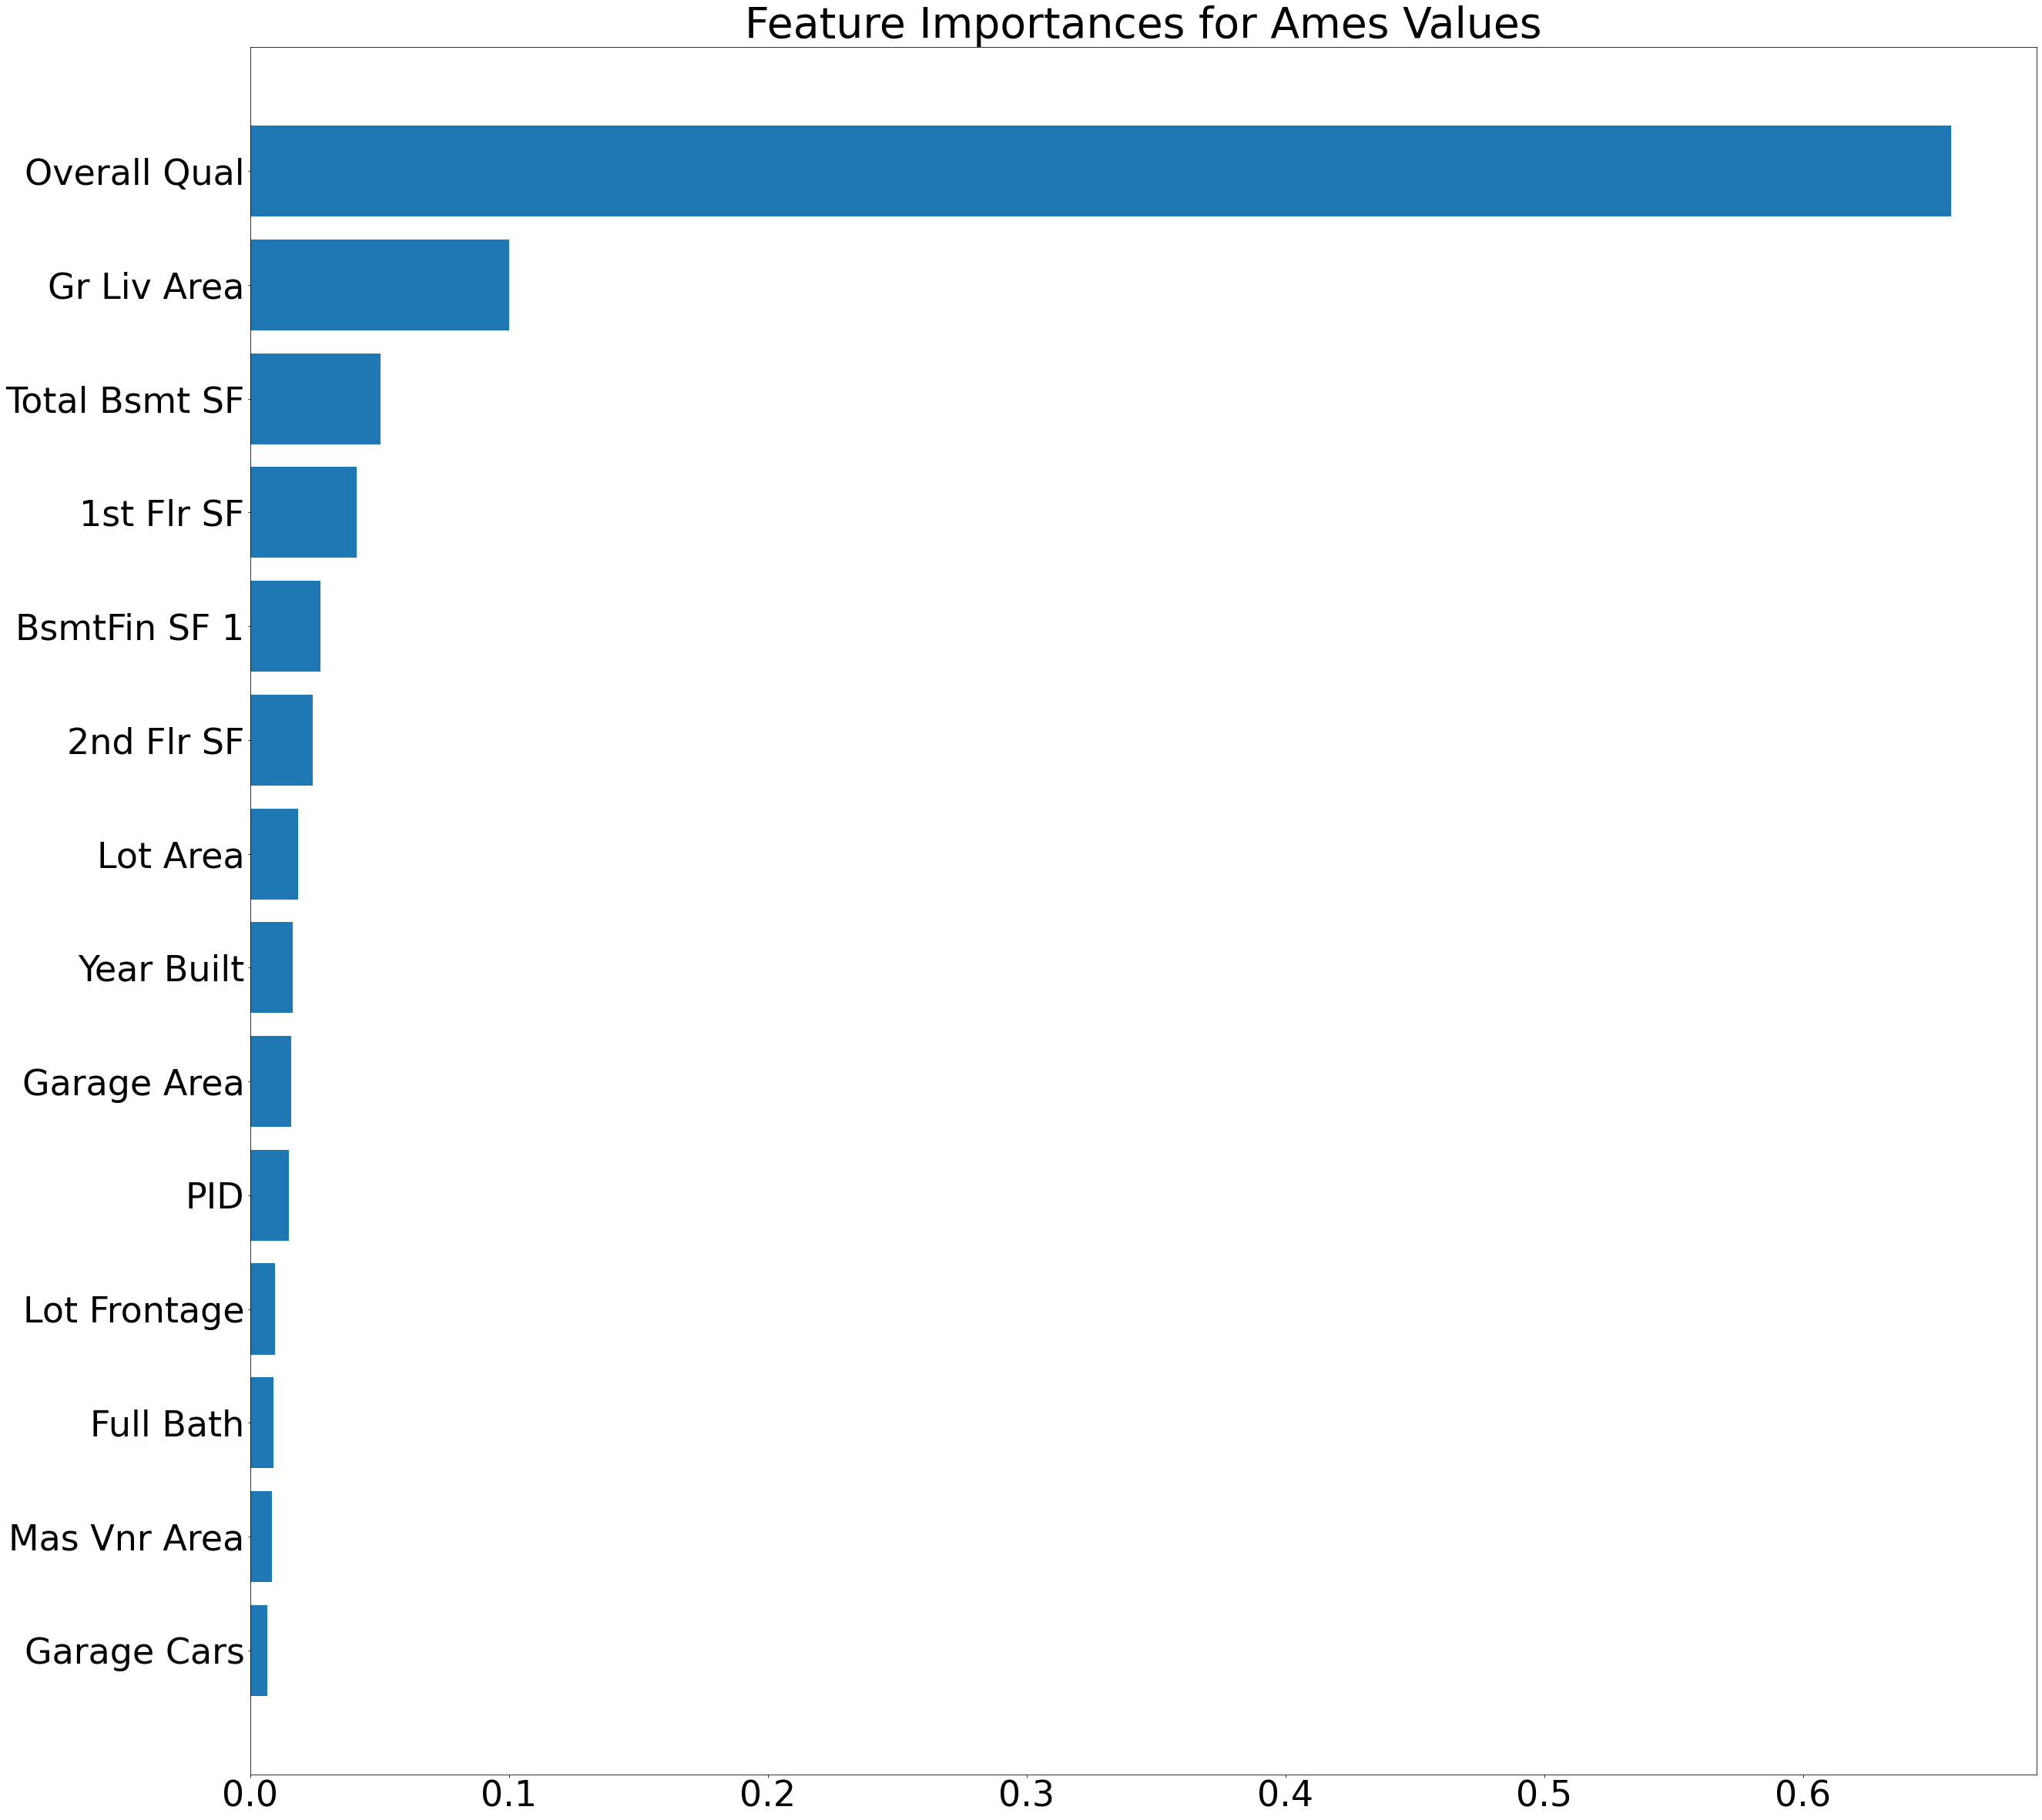

In [28]:
plt.rcParams.update({'figure.figsize': (38.0,34.0)})
plt.rcParams.update({'font.size': 46})
sorted_idx = rf15.feature_importances_.argsort()
plt.barh(df_XX.columns[sorted_idx], rf15.feature_importances_[sorted_idx])
plt.title("Feature Importances for Ames Values")

plt.tight_layout()
plt.savefig('FeatureImportance15.png')


Ok.  Obviously Overall Qual is the dominant variable.  When I look in the documentation, there is not much information on Overall Qual varialble.  It seems rather subjective and difficult to replicate.  It also exhibits an enormous influence on our model.  Lets see what happens if this variable is removed.

#### Random Forest Feature Importance WITHOUT the Overall Qual Variable

In [29]:
df_X = df.drop(columns=['Overall Qual', 'SalePrice'])
df_X.shape

(2274, 244)

In [30]:
X = df_X
y = df_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [31]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

Text(0.5, 1.0, 'Feature Importances for Ames Values')

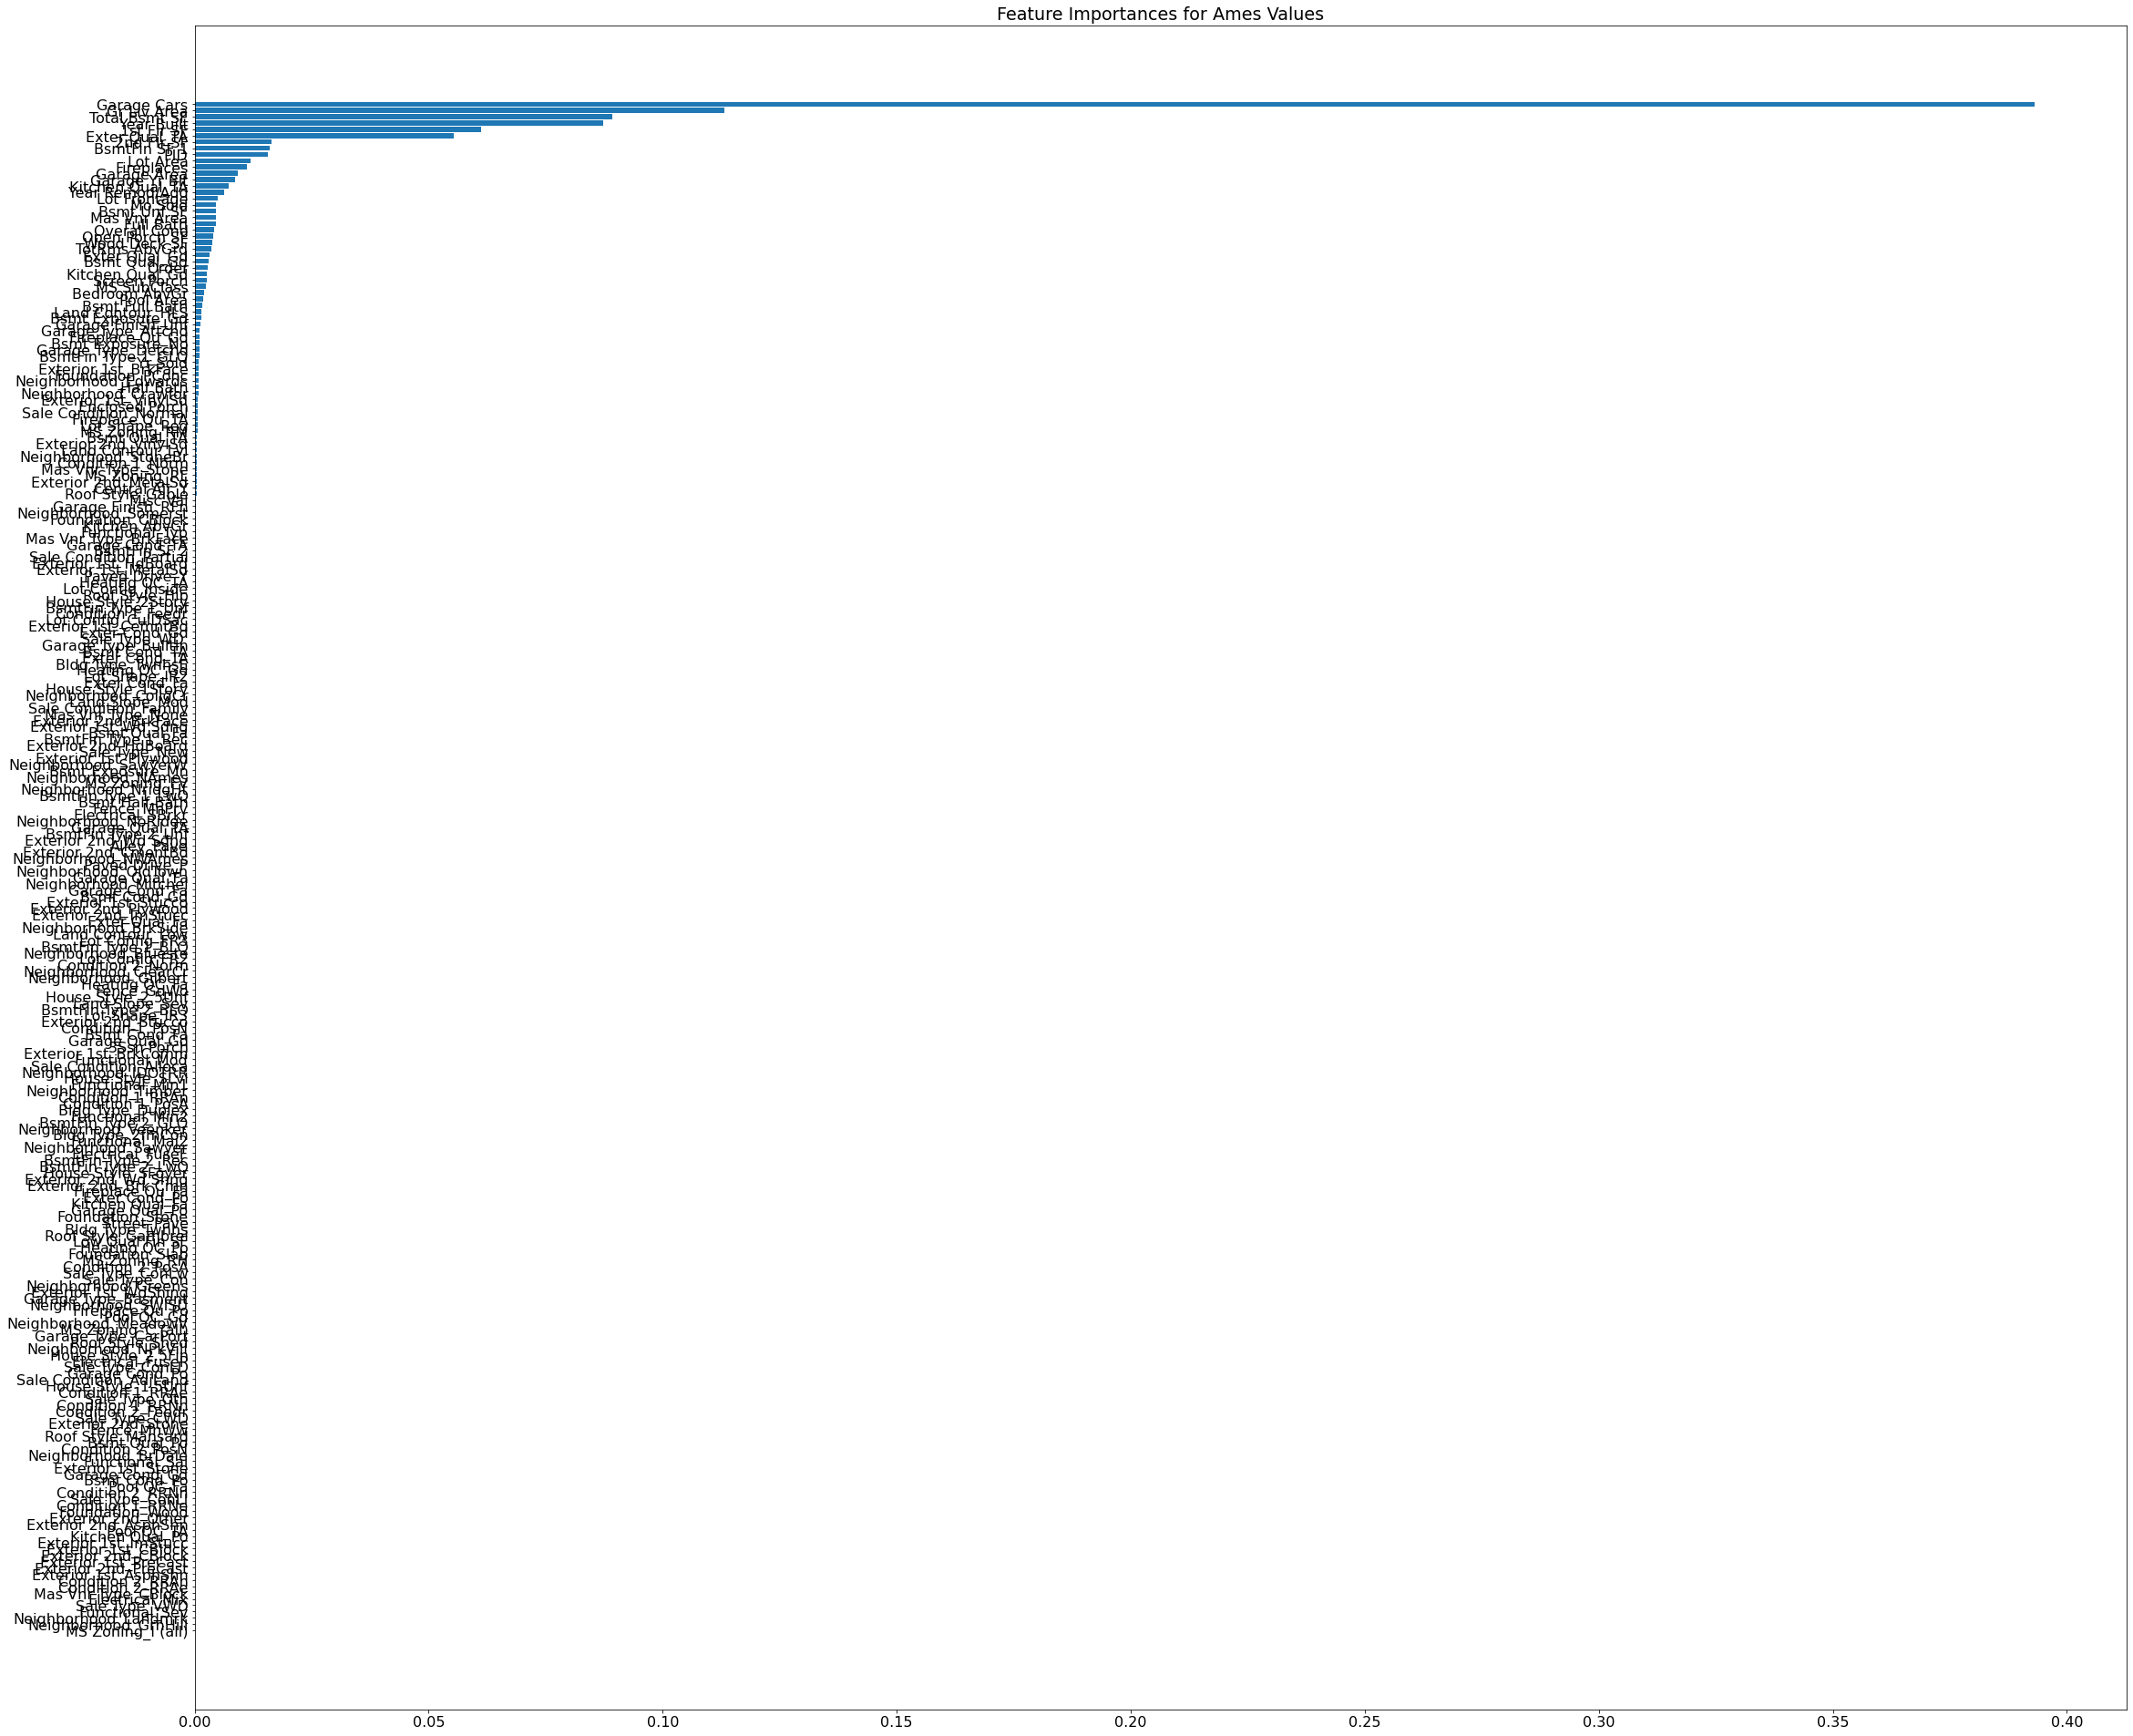

In [32]:
plt.rcParams.update({'figure.figsize': (38.0,34.0)})
plt.rcParams.update({'font.size': 16})
sorted_idx = rf.feature_importances_.argsort()
plt.barh(df_X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.title("Feature Importances for Ames Values")
#plt.savefig('FeatureImportance.png')

In [33]:
### Run the below to see the full list of feature importance excluding the Overall Qual Variable
#pd.options.display.max_rows = 4000
#yyy = pd.Index.tolist(df_X.columns[sorted_idx])
#yyy

In [34]:
 df_X = df_X[[ 'Year Remod/Add', 'Garage Yr Blt', 'Garage Area', 'Lot Area', 'Fireplaces', 'BsmtFin SF 1', 'PID',
 '2nd Flr SF', 'Exter Qual_TA', '1st Flr SF', 'Total Bsmt SF', 'Year Built', 'Gr Liv Area', 'Garage Cars']]

In [35]:
X = df_X
y = df_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [36]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

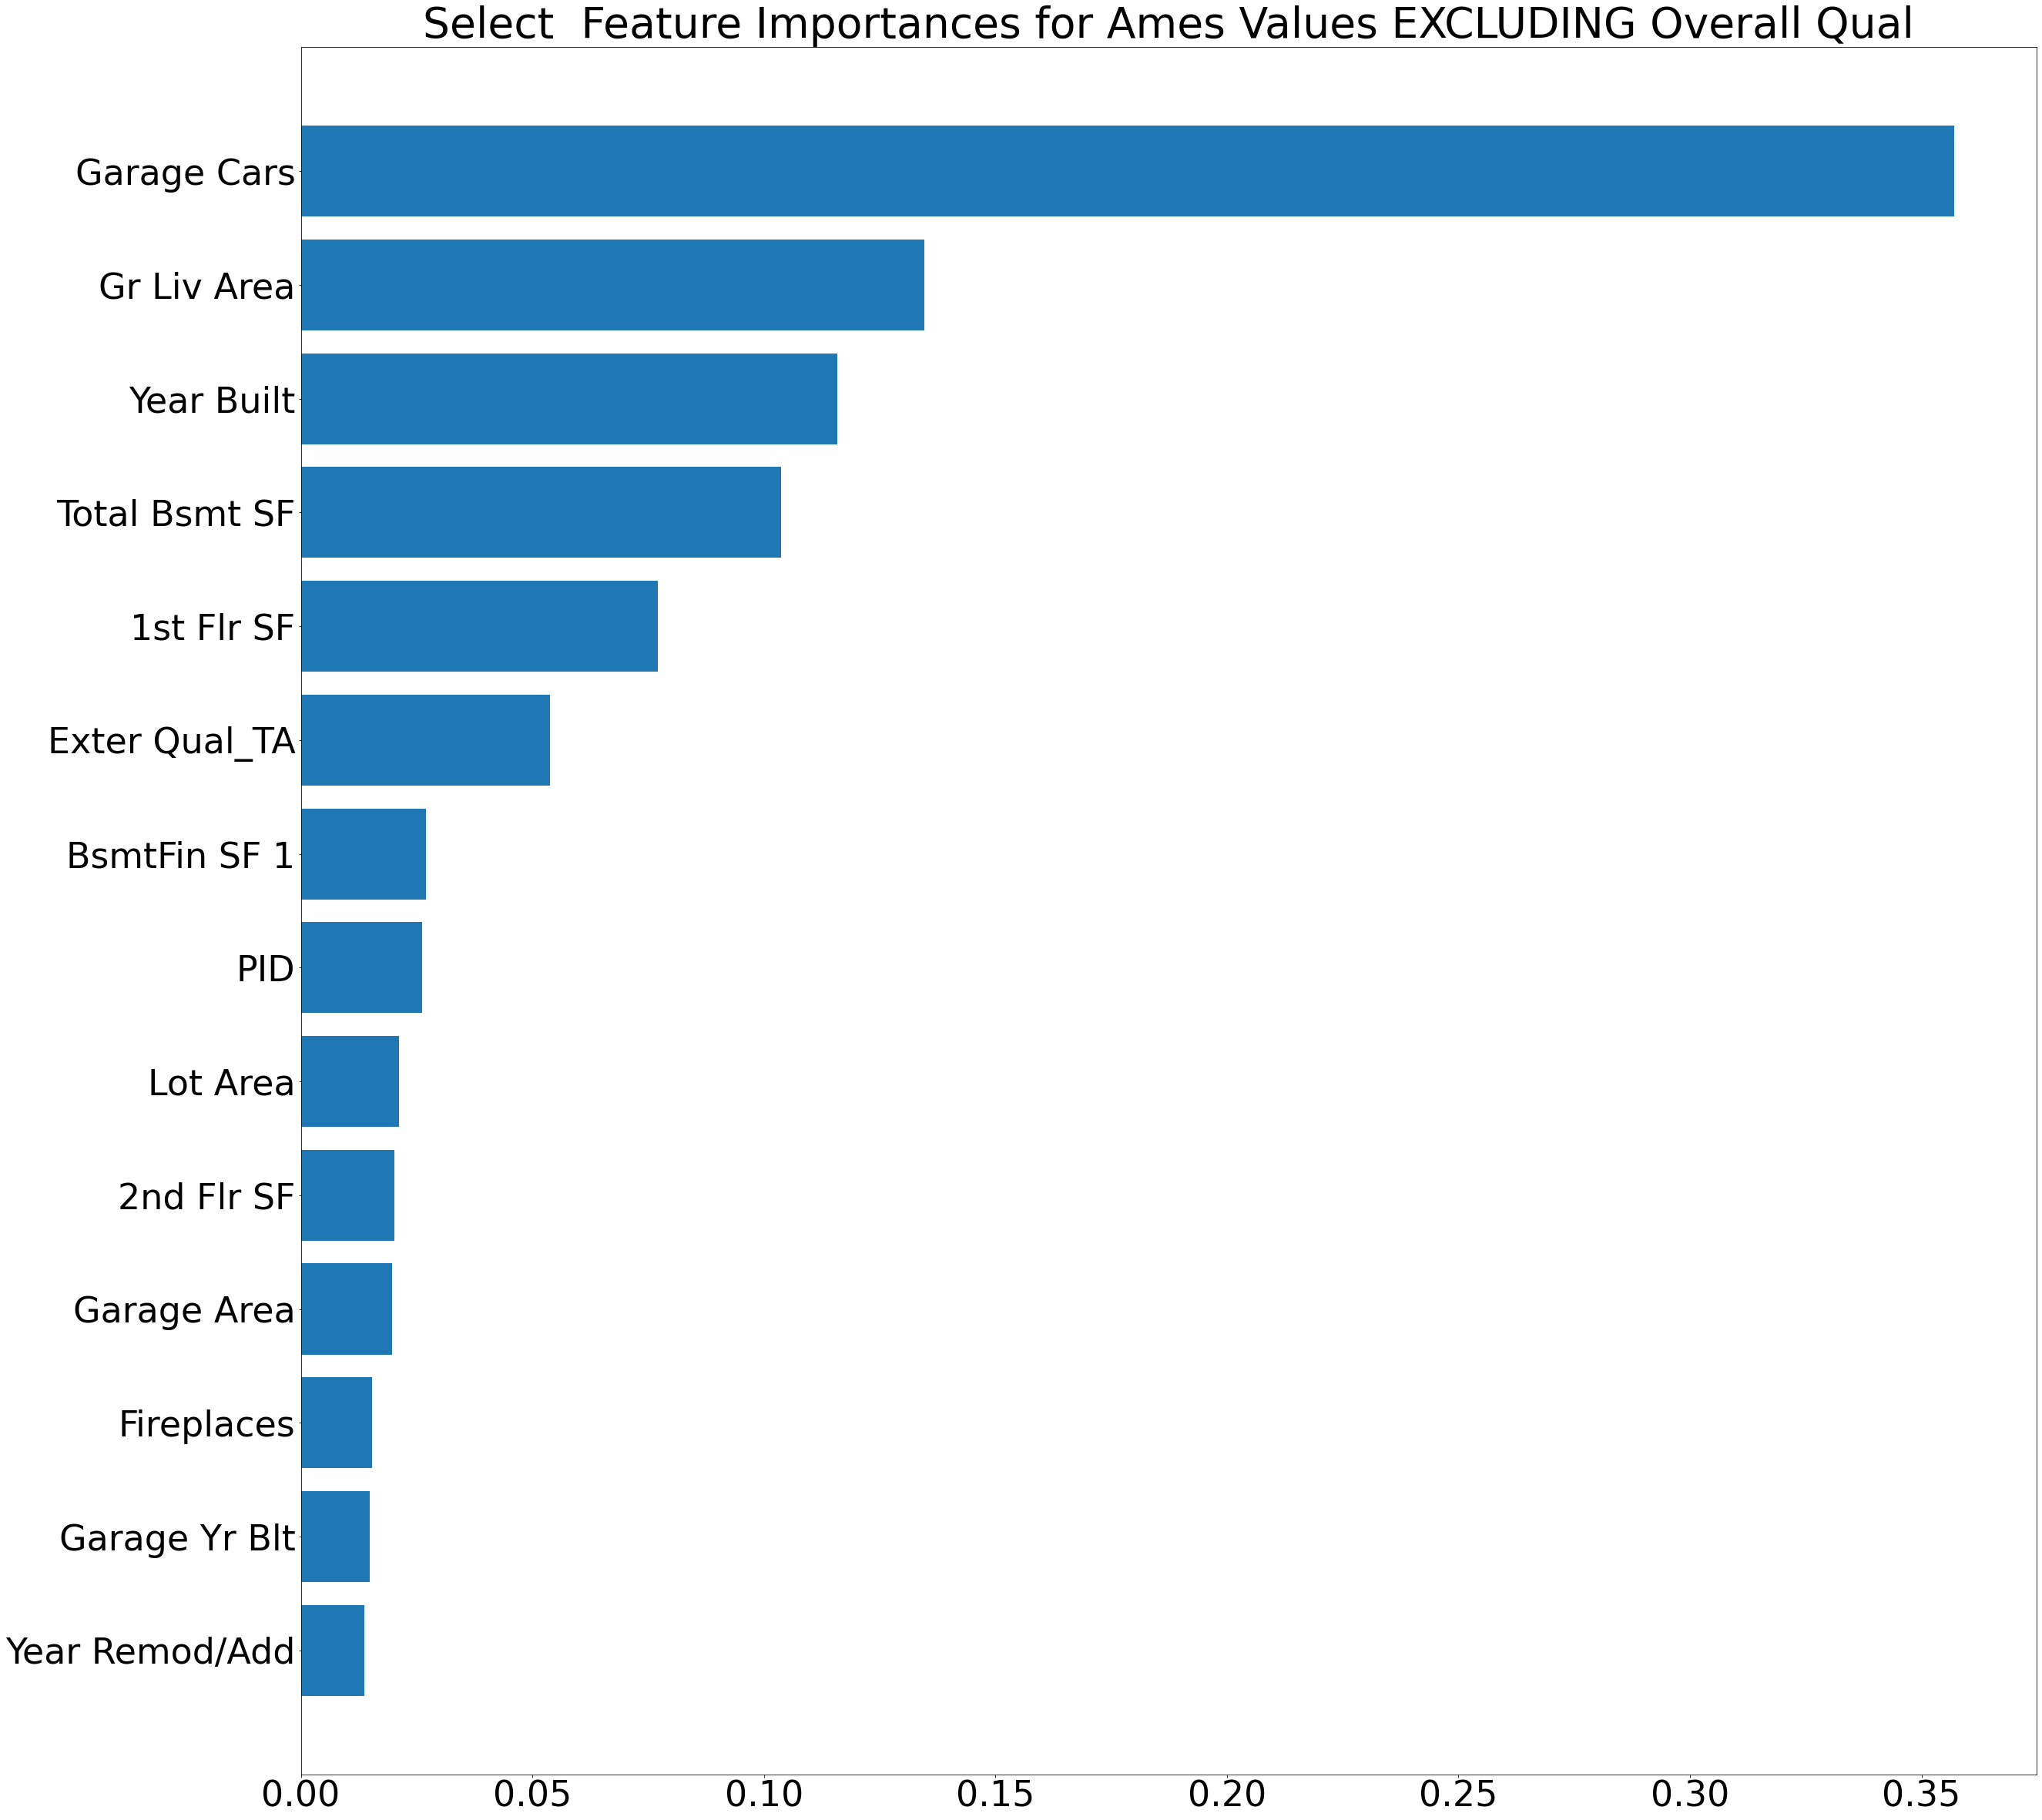

In [37]:
plt.rcParams.update({'figure.figsize': (38.0,34.0)})
plt.rcParams.update({'font.size': 46})

sorted_idx = rf.feature_importances_.argsort()
plt.barh(df_X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.title("Select  Feature Importances for Ames Values EXCLUDING Overall Qual")
plt.tight_layout()
plt.savefig('FeatureImportance_no_overallqual.png')

Well this is totally BONKERS.  The Garage Cars variable was 15th in importance WITH the Overall Qual variable but is now the TOP variable.  

#### Feature Importance with the addition of a Random Variable


In [38]:
df_X['randNumCol'] = np.random.randint(0,5, size=len(df_X))

In [39]:
df_X.shape

(2274, 15)

In [40]:
X = df_X
y = df_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [41]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)


RandomForestRegressor()

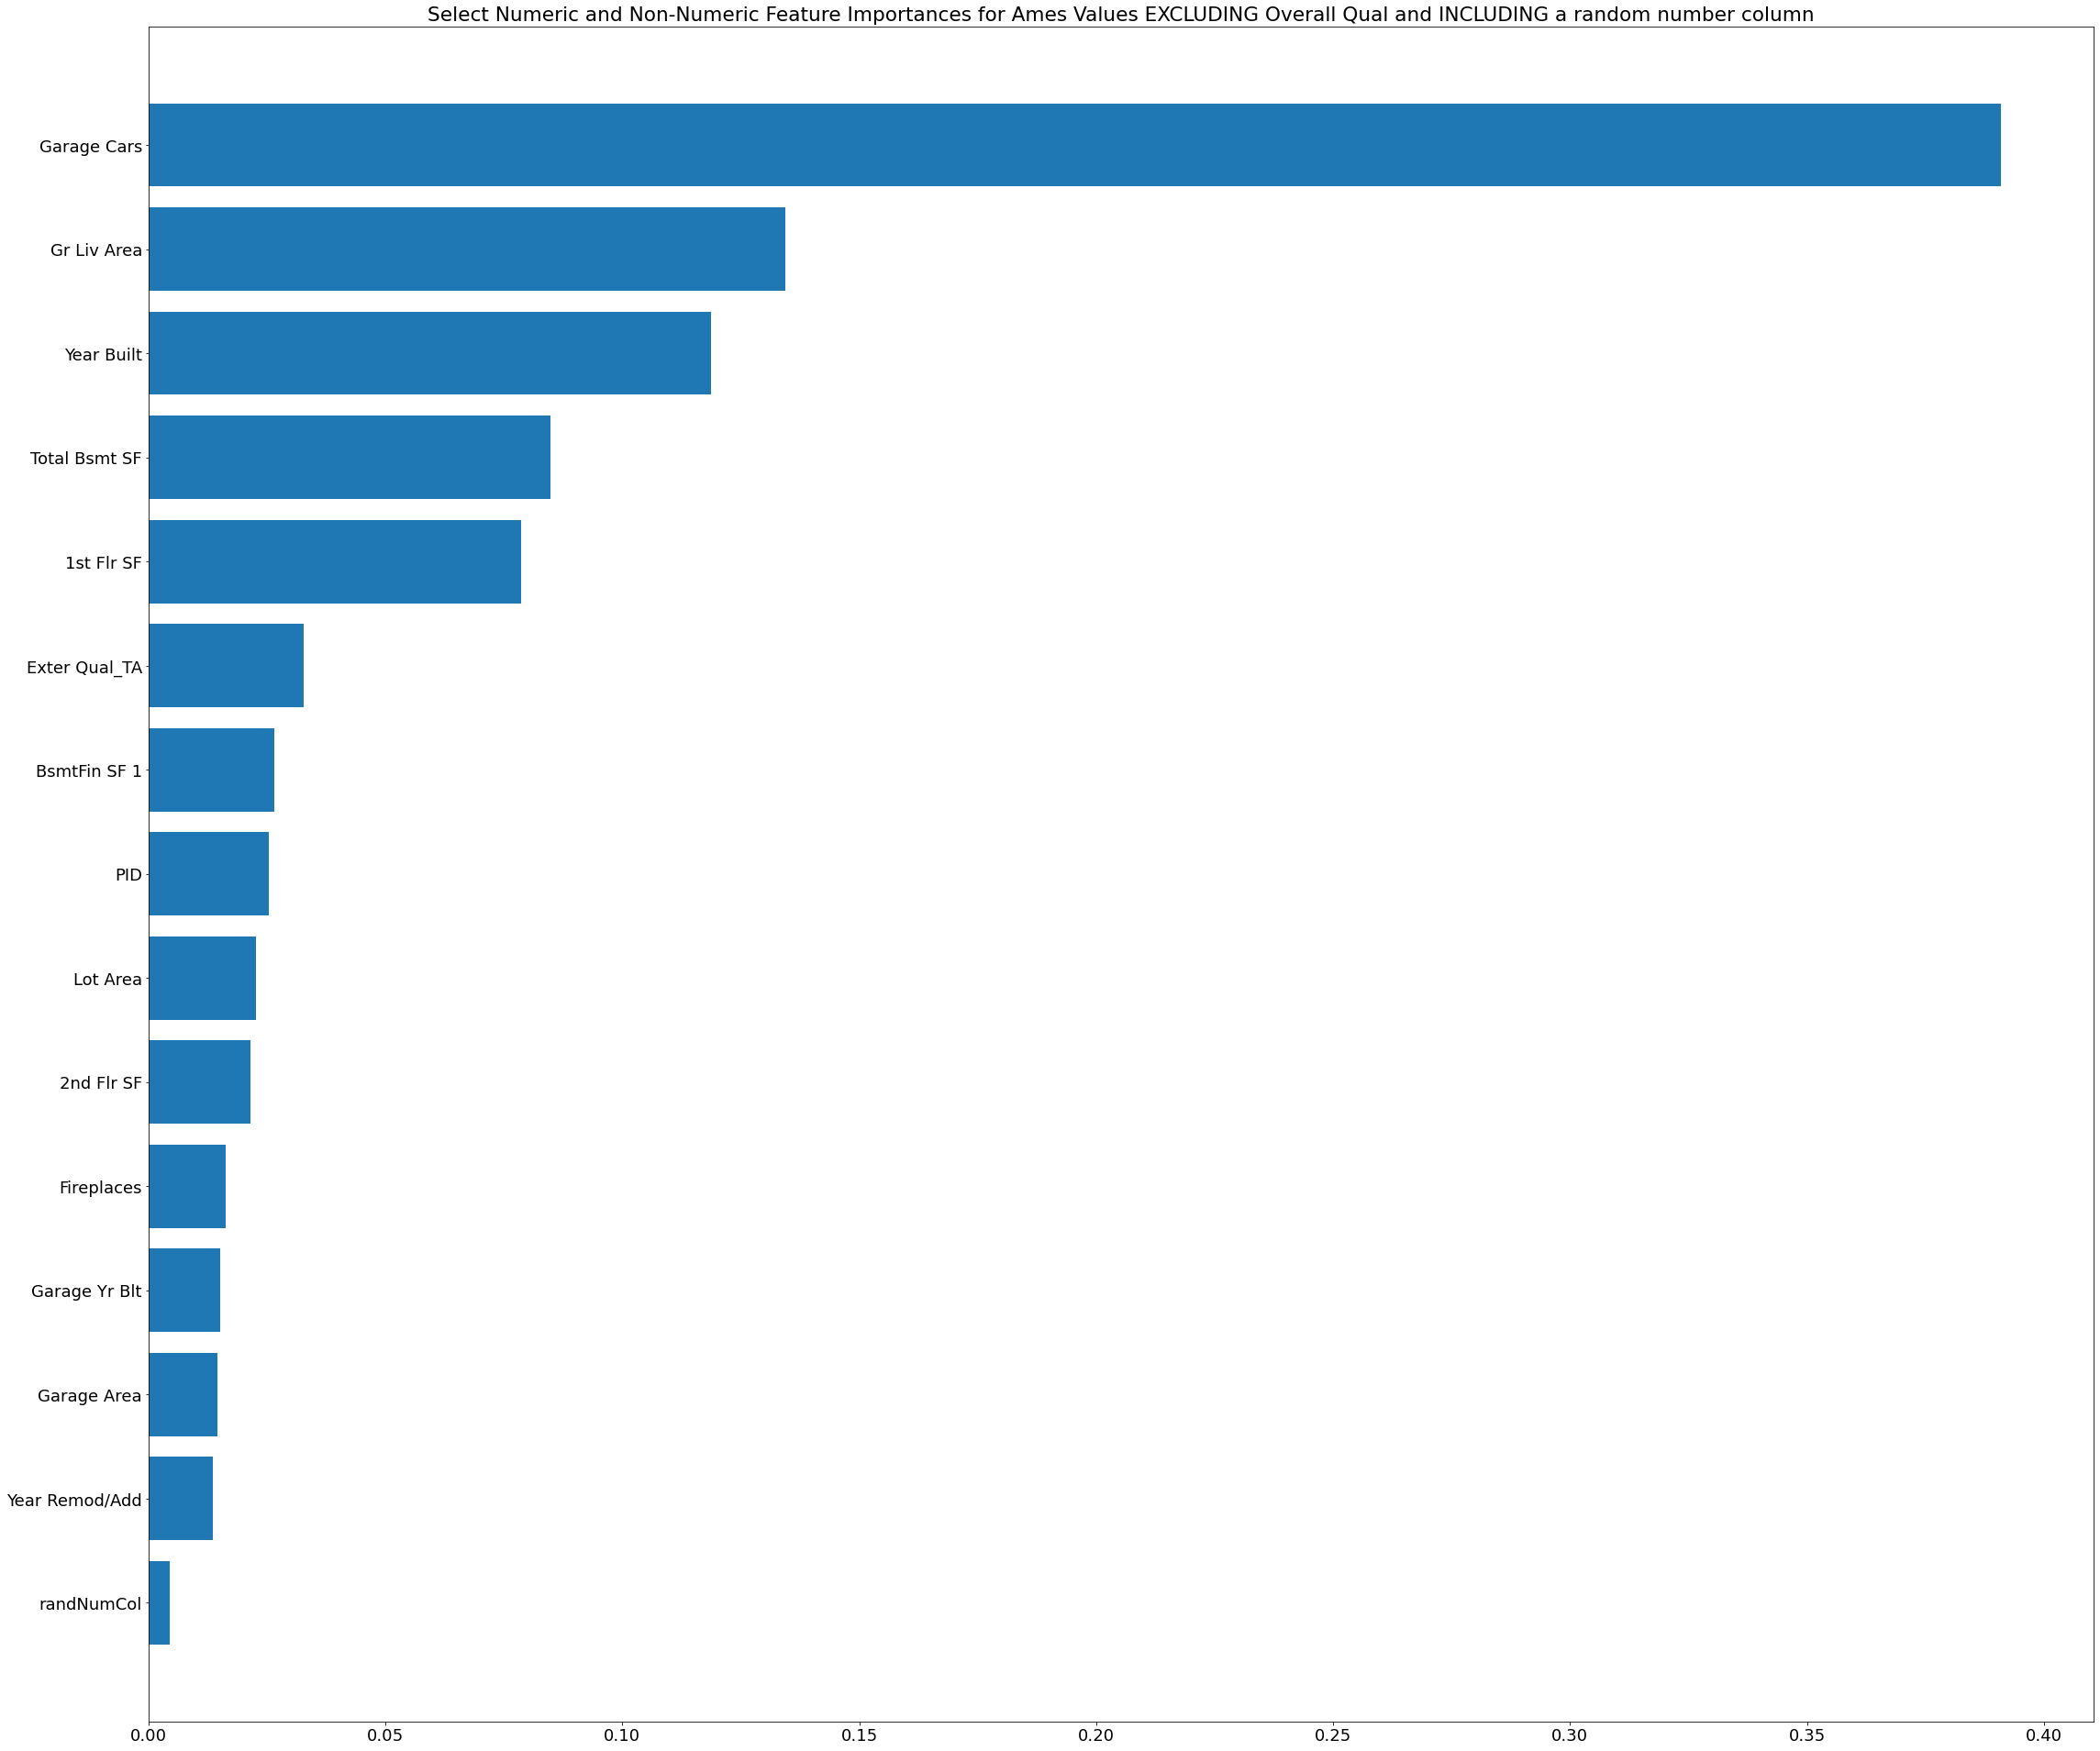

In [42]:
plt.rcParams.update({'figure.figsize': (38.0,34.0)})
plt.rcParams.update({'font.size': 18})

sorted_idx = rf.feature_importances_.argsort()
plt.barh(df_X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.title("Select Numeric and Non-Numeric Feature Importances for Ames Values EXCLUDING Overall Qual and INCLUDING a random number column")
plt.savefig('FeatureImportance2.png')

Ok.  Well a column of random numbers is towards the bottom of the pack in feature importance, so we can feel a little more confident that some of the other variables have more importance than a random variable.

## Step 7:  Deeper Dive into Most Relevant Variables

In the above analysis, a handfull of variables stood out as explanatory variables.  This changed according to how we parsed our data.  However, based on what we have done I would say the top five explanatory variables are:
1) Overall Quality

2) Garage Cars

3) Gross Livable Area

4) Year Built

5) Total Bsmt SF

Lets take a deeper dive into what is for now our Top 5 variables

#### Overall Qual

Our Feature Importance Analysis told us this was the most important feature.  We conducted our analysis with and without this variable.  Lets take a deeper dive.

Text(0.5, 1.0, 'Histogram of variable Overall Quality')

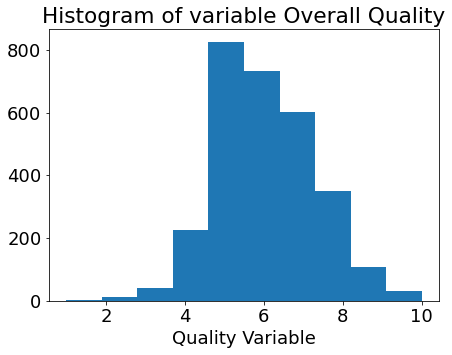

In [43]:
#  Histogram of overall quality variable
plt.rcParams.update({'figure.figsize': (7.0, 5.0)})
plt.hist(housing_data['Overall Qual'])
plt.xlabel('Quality Variable')
plt.title('Histogram of variable Overall Quality')

In [44]:
# First in location we are looking at the number of sales by overall quality.
df_nb = housing_data['Overall Qual'].value_counts()
df_nb

5     825
6     732
7     602
8     350
4     226
9     107
3      40
10     31
2      13
1       4
Name: Overall Qual, dtype: int64

In [45]:
#  Sales Price divided out by overall quality

df2 = housing_data[['Overall Qual', 'SalePrice']].groupby('Overall Qual').agg('mean')

df3 = round(df2, 2)
df4 = df3.sort_values(by = 'SalePrice', ascending = False)
df4

,SalePrice
Overall Qual,
10,450217.32
9,368336.77
8,270913.59
7,205025.76
6,162130.32
5,134752.52
4,106485.10
3,83185.98
2,52325.31


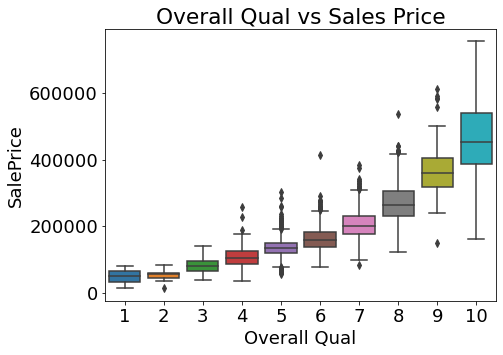

In [46]:
# Plotting overall quality vs sales price
plt.rcParams.update({'figure.figsize': (7.0, 5.0)})
sns.boxplot(x = 'Overall Qual', y = 'SalePrice', data = housing_data)
plt.title('Overall Qual vs Sales Price')
plt.savefig('Overall_Qual_vs_SalesPrice1.png')
plt.show()


#### Garage Cars

Text(0.5, 1.0, 'Histogram of Garage Cars variable')

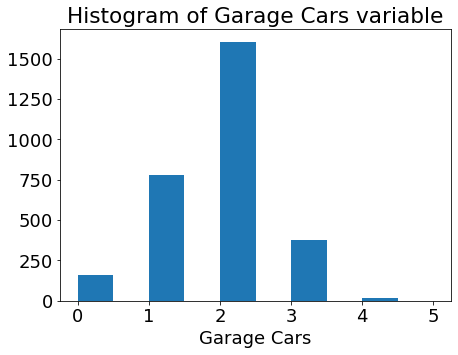

In [47]:
plt.rcParams.update({'figure.figsize': (7.0, 5.0)})
plt.hist(housing_data['Garage Cars'])
plt.xlabel('Garage Cars')
plt.title('Histogram of Garage Cars variable')

Thankfully, four car garages are relatively rare.  

In [48]:
df2 = housing_data[['Garage Cars', 'SalePrice']].groupby('Garage Cars').agg('mean')

df3 = round(df2, 2)
df4 = df3.sort_values(by = 'SalePrice', ascending = False)
df4

,SalePrice
Garage Cars,
3.0,310304.62
4.0,228748.69
2.0,183562.10
1.0,127267.42
5.0,126500.00
0.0,104949.25


There does seem to be a premium for 3 car garages.

In [49]:
housing_data['Garage Cars'].isnull().sum()

1

In [50]:
x_cars = df_X['Garage Cars']
y_pear = df_y['SalePrice']

pearson = np.corrcoef(x_cars, y_pear)
print("pearson correlation coefficient between Garage Cars and Sales Price")
print(pearson)

pearson correlation coefficient between Garage Cars and Sales Price
[[1.         0.66128772]
 [0.66128772 1.        ]]


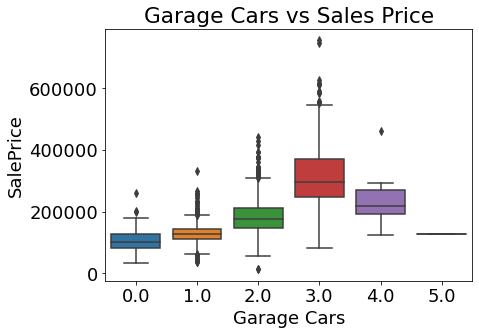

In [51]:
plt.rcParams.update({'figure.figsize': (7.0, 5.0)})
sns.boxplot(x = 'Garage Cars', y = 'SalePrice', data = housing_data)
plt.title('Garage Cars vs Sales Price')
plt.tight_layout()
plt.savefig('Garage_Cars_vs_SalesPrice.png')
plt.show()


#### Gross Livable Area SF

Text(0.5, 1.0, 'Histogram of variable Square Feet')

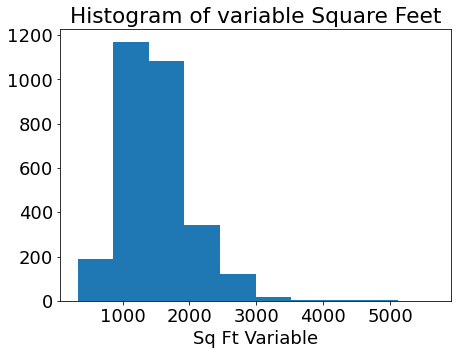

In [52]:
plt.rcParams.update({'figure.figsize': (7.0, 5.0)})
plt.hist(housing_data['Gr Liv Area'])
plt.xlabel('Sq Ft Variable')
plt.title('Histogram of variable Square Feet')

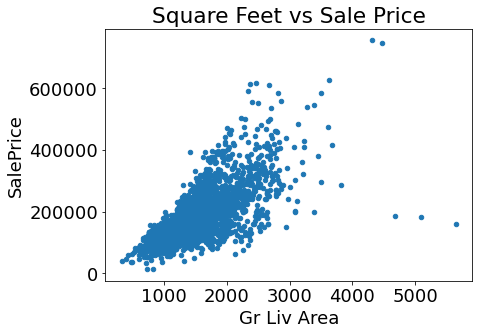

In [53]:
plt.rcParams.update({'figure.figsize': (7.0, 5.0)})
housing_data.plot(x = 'Gr Liv Area', y = 'SalePrice', kind = 'scatter')
plt.title("Square Feet vs Sale Price")
plt.tight_layout()
plt.savefig('Gr.Liv.Ar.png')
plt.show()

In [54]:
x_pear = df_X['Gr Liv Area']
y_pear = df_y['SalePrice']

pearson = np.corrcoef(x_pear, y_pear)
print("pearson correlation coefficient between Gr Liv Area (sq ft) and Sales Price")
print(pearson)

pearson correlation coefficient between Gr Liv Area (sq ft) and Sales Price
[[1.         0.71417074]
 [0.71417074 1.        ]]


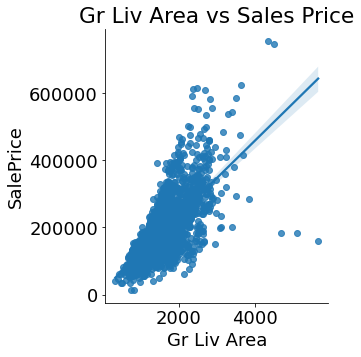

In [55]:

sns.lmplot(x = 'Gr Liv Area', y = 'SalePrice', data = housing_data)
plt.title('Gr Liv Area vs Sales Price')
plt.savefig('Gr Liv Area_vs_SalesPrice.png')
plt.show()


#### Year Built


Text(0.5, 1.0, 'Histogram of target variable Year Built')

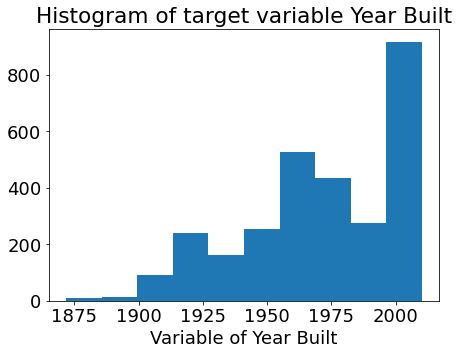

In [56]:
plt.rcParams.update({'figure.figsize': (7.0, 5.0)})
plt.hist(housing_data['Year Built'])
plt.xlabel('Variable of Year Built')
plt.title('Histogram of target variable Year Built')

Many modern homes in Ames were built fairly recently

In [57]:
df2 = housing_data[['Year Built', 'SalePrice']].groupby('Year Built').agg('mean')

df3 = round(df2, 2)
df4 = df3.sort_values(by = 'SalePrice', ascending = False)
df4

,SalePrice
Year Built,
1893,325000.00
2008,314300.22
1892,291250.00
2010,283116.00
2009,277097.44
...,...
1902,97500.00
1875,94000.00
1907,93369.00


Probably too many 'bins' for this to make sense of.  The histogram was more useful.  Lets look at a scatter plot.

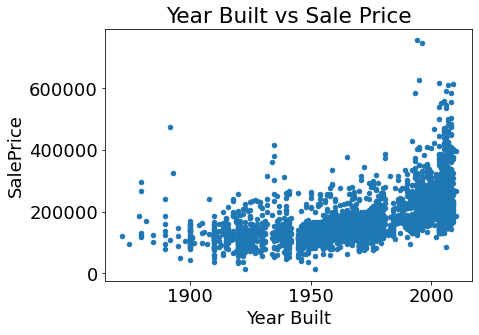

In [58]:
plt.rcParams.update({'figure.figsize': (7.0, 5.0)})
housing_data.plot(x = 'Year Built', y = 'SalePrice', kind = 'scatter')
plt.title("Year Built vs Sale Price")
plt.tight_layout()
plt.savefig('Year_Built_vs_SalesPrice.png')
plt.show()


Looks like many of the more expensive homes are built more recently.

In [59]:
x_built = df_X['Year Built']
y_pear = df_y['SalePrice']

pearson = np.corrcoef(x_built, y_pear)
print("pearson correlation coefficient between Gr Liv Area (sq ft) and Sales Price")
print(pearson)

pearson correlation coefficient between Gr Liv Area (sq ft) and Sales Price
[[1.         0.55962232]
 [0.55962232 1.        ]]


For year built, we can also do an independent t-test to see if there is a statistically significant difference between the sales prices of more recently constructed homes and older homes.

In [60]:

pre_1973 = housing_data[housing_data['Year Built'] < 1973]
plus_1973 = housing_data[housing_data['Year Built'] >= 1973]
print("Mean sale price of homes built before 1973: " + str(round(pre_1973['SalePrice'].mean(), 2)))
print('Mean sale price of home built in 1973 or after:  ' + str(round(plus_1973['SalePrice'].mean(), 2)))
print("  ")
import scipy.stats as stats
stats.ttest_ind(pre_1973['SalePrice'], plus_1973['SalePrice'])

Mean sale price of homes built before 1973: 137067.6
Mean sale price of home built in 1973 or after:  223638.13
  


Ttest_indResult(statistic=-34.88939020374825, pvalue=2.495344093041185e-223)

#### Basement SF

Text(0.5, 1.0, 'Histogram of Basement SF variable')

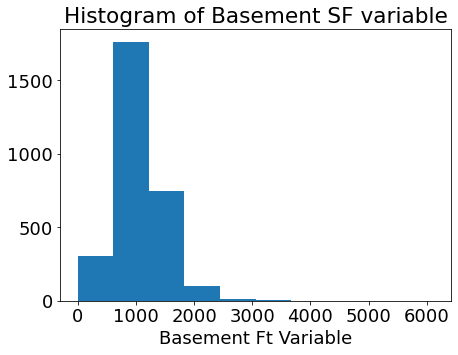

In [61]:
plt.rcParams.update({'figure.figsize': (7.0, 5.0)})
plt.hist(housing_data['Total Bsmt SF'])
plt.xlabel('Basement Ft Variable')
plt.title('Histogram of Basement SF variable')

I would have thought fewer homes had basements...

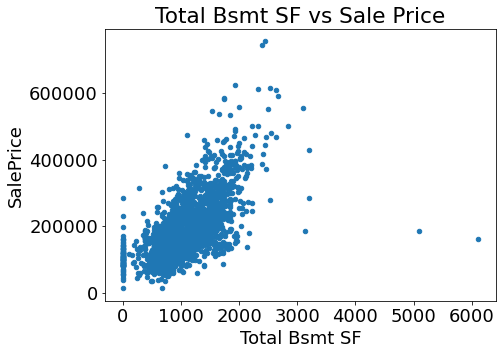

<Figure size 504x360 with 0 Axes>

In [62]:
plt.rcParams.update({'figure.figsize': (7.0, 5.0)})
housing_data.plot(x = 'Total Bsmt SF', y = 'SalePrice', kind = 'scatter')
plt.title("Total Bsmt SF vs Sale Price")
plt.show()
plt.savefig('Total_Bsmt_SF_vs_SalesPrice.png')

## Step 8 Summary of findings

We have continued our investigation on the Ames Housing Data.  In particular have looked more closely into our target (Sales Price) by conducting univariate analysis on this variable.  In addition we have looked into the relationship between our other variables plotting each variable against the target variable to visualize the relationship between each variable.  Finally, a Random Forest Feature Importance analysis was conducted followed by a deeper dive into some of the key variables.